# Exploring the Heliosphere with Python

This notebook demonstrates loading and plotting science data in the Heliosphere using PySPEDAS and SunPy. It includes simple examples from 17 missions, as well as data from ground magnetometers and geomagnetic indices.

**By Eric Grimes, UCLA - Earth, Planetary, and Space Sciences/Institute of Geophysics and Planetary Physics**

egrimes(at)igpp.ucla.edu

Last updated: June 20, 2023

Notes:
- I tried to start with the Sun, and go all the way to the ground; so solar data are first and ground data are last (with a short detour to Mars)
- For the most part, the data shown are from March 27, 2017; exceptions are Parker Solar Probe and Solar Orbiter (which had not launched yet, so more recent examples are used).
- Only a few data products are loaded/plotted for each spacecraft in this notebook, so not all spacecraft/instruments/data products are demonstrated. For a list of the full capabilities, please see the documentation:

PySPEDAS: https://pyspedas.readthedocs.io/

SunPy: https://sunpy.org/

- The SunPy examples were taken from the SunPy examples gallery, with minor changes for our event
- Other Python in Heliophysics Community (PyHC) projects used in this notebook:

cdflib: https://cdflib.readthedocs.io/

PyTplot: https://pytplot.readthedocs.io/

Geopack: https://github.com/tsssss/geopack

HAPI client: https://github.com/hapi-server/client-python

>[Exploring the Heliosphere with Python](#scrollTo=7of2f7In4ju9)

>>[Solar and Heliospheric Observatory satellite (SOHO)](#scrollTo=63VP0tdm7sr5)

>>[Solar Dynamics Observatory (SDO)](#scrollTo=LBbTEsRU8iJP)

>>[Parker Solar Probe](#scrollTo=YI5IRRJTIgoh)

>>[Solar Orbiter](#scrollTo=dOmstkoqI6G0)

>>[Advanced Composition Explorer (ACE)](#scrollTo=repQs8PglYkK)

>>[Deep Space Climate Observatory (DSCOVR)](#scrollTo=uNUdKsUhkzL7)

>>[Solar Terrestrial Relations Observatory (STEREO)](#scrollTo=r-7y4swZcPan)

>>[Mars Atmosphere and Volatile Evolution (MAVEN)](#scrollTo=GsHDJoLzlzlc)

>>[OMNI](#scrollTo=P8o9_s4NlpUJ)

>>[Kyoto Dst](#scrollTo=kvwReQcYoTga)

>>[Geotail](#scrollTo=3aKOINyJbquI)

>>[Magnetospheric Multiscale (MMS)](#scrollTo=KCUfQYIElyri)

>>[Cluster](#scrollTo=EcsRGbTs3Mfd)

>>[Time History of Events and Macroscale Interactions during Substorms (THEMIS)](#scrollTo=Fz40PKL4cGQF)

>>[Van Allen Probes (formerly RBSP)](#scrollTo=DDlc_B52b5Sf)

>>[Arase](#scrollTo=5mR0VVLcmQtv)

>>[Geopack (Tsyganenko field models)](#scrollTo=hgmYsl5IzQ7N)

>>[Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)](#scrollTo=PAY8dDZImU1N)

>>[Polar Operational Environmental Satellites (POES)](#scrollTo=nWCmey5BmYRu)

>>[Swarm](#scrollTo=85RU5QRK4CKY)

>>[Spherical Elementary Currents (SECS)](#scrollTo=IwQmONDMn14b)

>>[Equivalent Ionospheric Currents (EICS)](#scrollTo=WyuIzxA_oEDq)

>>[All Sky Imager data](#scrollTo=cS5ZJ8DQocJQ)

>>[Ground magnetometer data](#scrollTo=YupmshpcoX-l)

>>[Magnetic Induction Coil Array (MICA)](#scrollTo=BeVmdYo4oe5U)

>>[Resources](#scrollTo=CJRw4BVBMVIP)

>>>[PyTplot Basics](#scrollTo=CJRw4BVBMVIP)

>>>[Loading Data](#scrollTo=CJRw4BVBMVIP)

>>>[Plotting Data](#scrollTo=CJRw4BVBMVIP)

>>>[Dates and Times](#scrollTo=CJRw4BVBMVIP)

>>>[Coordinate Transformations](#scrollTo=CJRw4BVBMVIP)

>>>[Analysis](#scrollTo=CJRw4BVBMVIP)

>>>[Documentation](#scrollTo=CJRw4BVBMVIP)



Install PySPEDAS and all its required dependencies: This is needed in Google Colab, but if you already have pyspedas installed, you can skip it or comment it out.

In [1]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Install sunpy and some related packages needed for SOHO example:  These are not installed by default with pyspedas, so unless you've installed them already, you probably need this.

In [2]:
!pip install sunpy
!pip install zeep
!pip install drms


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Install basemap package (needed for SECS and EICS examples):  Again, this is not installed by default with pyspedas, so you may need this.

In [3]:
!pip install basemap


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Restart the session to pick up any newly installed packages:

In [4]:
exit()

In [1]:
trange = ['2017-03-27', '2017-03-28']

## Solar and Heliospheric Observatory satellite (SOHO) <a class="anchor" id="soho"></a>

The joint NASA-ESA [Solar & Heliospheric Observatory](https://www.nasa.gov/mission_pages/soho/index.html) mission -- SOHO -- was designed to study the Sun inside out, from its internal structure, to the extensive outer atmosphere, to the solar wind that it blows across the solar system. 


Create a figure of LASCO C2 data

In [2]:
import os

import matplotlib.pyplot as plt

import astropy.time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

timerange = a.Time('2017/03/27 06:00', '2017/03/27 06:01')
instrument = a.Instrument.lasco
detector = a.Detector.c2
result = Fido.search(timerange, instrument, detector)
downloaded_files = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

22630019.fts:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

2025-01-10 11:11:53 - astropy - WARNING: VerifyWarning: Verification reported errors:
2025-01-10 11:11:53 - astropy - WARNING: VerifyWarning: Card 78:
2025-01-10 11:11:53 - astropy - WARNING: VerifyWarning:     Unfixable error: Unprintable string 'offset_bias.pro\t1.39, 12/27/16, 633.381'; commentary cards may only contain printable ASCII characters
 [astropy.io.fits.verify]
2025-01-10 11:11:53 - astropy - WARNING: VerifyWarning: Note: astropy.io.fits uses zero-based indexing.

2025-01-10 11:11:53 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]
2025-01-10 11:11:53 - sunpy - WARNING: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadat

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


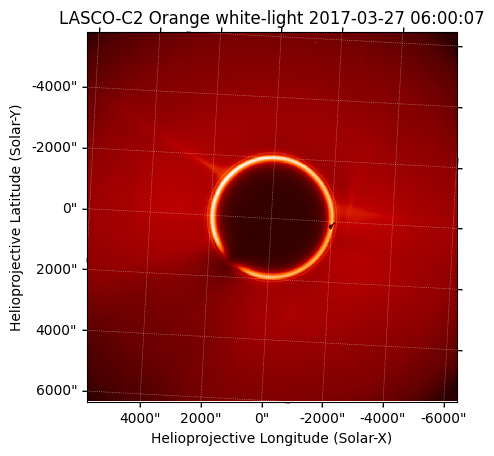

In [3]:
lascomap = sunpy.map.Map(downloaded_files[0])
fig = plt.figure()
lascomap.plot()

plt.show()

Load the CELIAS data

In [4]:
import pyspedas

pyspedas.projects.soho.celias(trange=['2017-03-27', '2017-03-28'])

10-Jan-25 11:12:03: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/celias/pm_5min/2017/
10-Jan-25 11:12:04: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/celias/pm_5min/2017/soho_celias-pm_5min_20170327_v02.cdf to soho_data/celias/pm_5min/2017/soho_celias-pm_5min_20170327_v02.cdf
10-Jan-25 11:12:04: Download complete: soho_data/celias/pm_5min/2017/soho_celias-pm_5min_20170327_v02.cdf


['V_p',
 'N_p',
 'Vth_p',
 'NS_angle',
 'V_He',
 'CRN',
 'GSE_POS',
 'HC_RANGE',
 'HG_LAT',
 'HG_LONG']

Plot the proton velocity, density and SOHO spacecaft position in GSE coordinates, as a function of time:



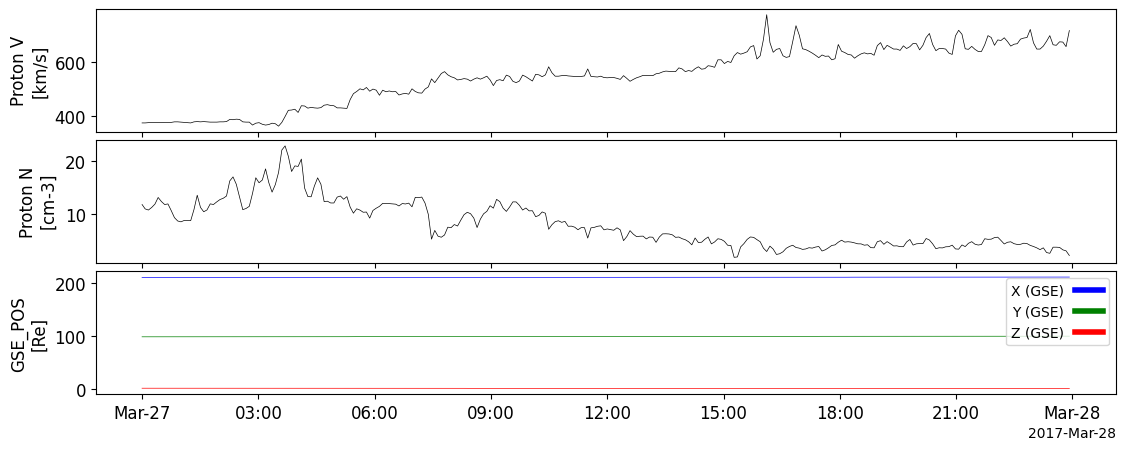

In [5]:
from pyspedas import tplot

tplot(['V_p', 'N_p', 'GSE_POS'])

Load the COSTEP data:

In [6]:
pyspedas.projects.soho.costep(trange=['2017-03-27', '2017-03-28'], time_clip=True, datatype='ephin_l3i-1min')

10-Jan-25 11:12:16: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/costep/ephin_l3i-1min/2017/
10-Jan-25 11:12:17: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/costep/ephin_l3i-1min/2017/soho_costep-ephin_l3i-1min_20170101_v01.01.cdf to soho_data/costep/ephin_l3i-1min/2017/soho_costep-ephin_l3i-1min_20170101_v01.01.cdf
10-Jan-25 11:12:50: Download complete: soho_data/costep/ephin_l3i-1min/2017/soho_costep-ephin_l3i-1min_20170101_v01.01.cdf


['status',
 'accum_time',
 'P_int',
 'P_sys',
 'P_stat',
 'He_int',
 'He_sys',
 'He_stat']

Plot the COSTEP proton intensity:

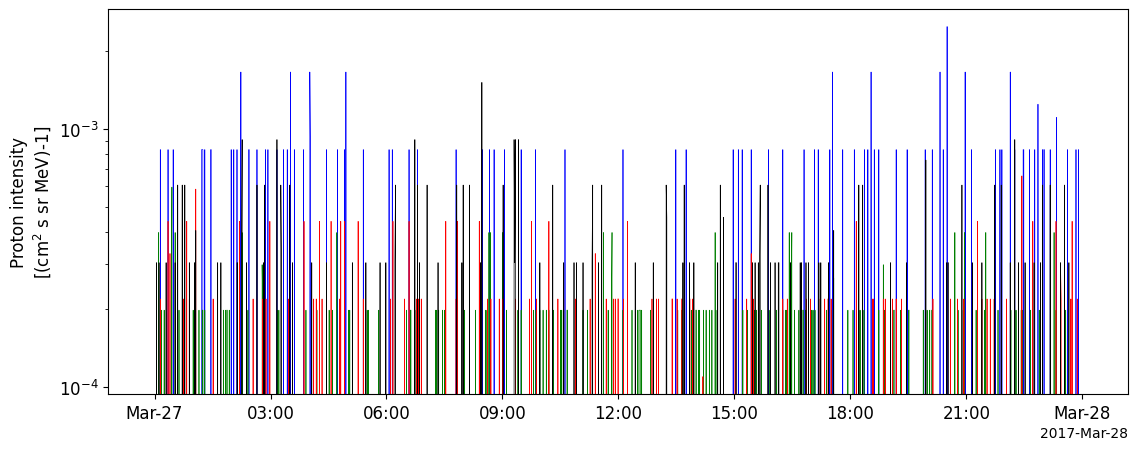

In [7]:
tplot('P_int')

In [8]:
pyspedas.projects.soho.erne(trange=trange)

10-Jan-25 11:13:06: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2017/
10-Jan-25 11:13:09: Downloading https://spdf.gsfc.nasa.gov/pub/data/soho/erne/hed_l2-1min/2017/soho_erne-hed_l2-1min_20170327_v01.cdf to soho_data/erne/hed_l2-1min/2017/soho_erne-hed_l2-1min_20170327_v01.cdf
10-Jan-25 11:13:10: Download complete: soho_data/erne/hed_l2-1min/2017/soho_erne-hed_l2-1min_20170327_v01.cdf


['est', 'PH', 'AH', 'PHC', 'AHC']

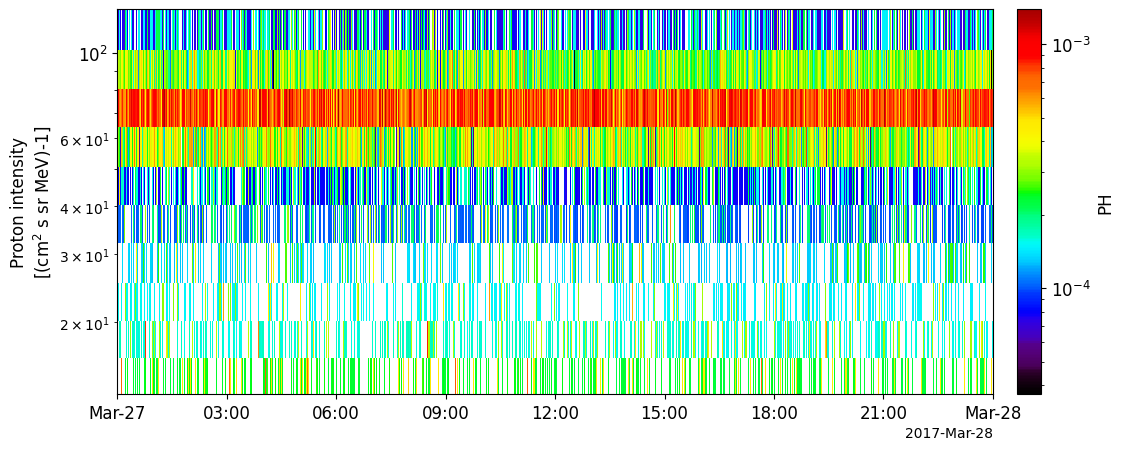

In [9]:
from pytplot import options

options('PH', 'spec', True)
options('PH', 'ylog', True)
options('PH', 'zlog', True)

tplot(['PH'])

## Solar Dynamics Observatory (SDO) <a class="anchor" id="sdo"></a>

The [Solar Dynamics Observatory (SDO)](https://sdo.gsfc.nasa.gov/mission/) is designed to help us understand the Sun's influence on Earth and Near-Earth space by studying the solar atmosphere on small scales of space and time and in many wavelengths simultaneously.

Create an HMI magnetogram

In [10]:
result = Fido.search(a.Time('2017/03/27 06:00', '2017/03/27 06:01'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
downloaded_file = Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi_m_45s_2017_03_27_06_01_30_tai_magnetogram.fits:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

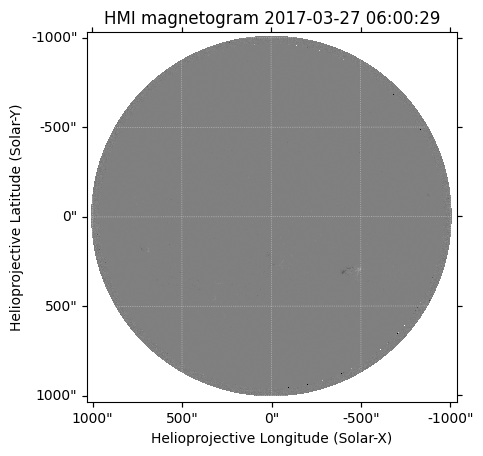

In [11]:
hmi_map = sunpy.map.Map(downloaded_file[0])
fig = plt.figure()
hmi_map.plot()

plt.show()

Create an image from Atmospheric Imaging Assembly (AIA)

In [12]:
t0 = astropy.time.Time('2017-03-27T06:00:01', scale='utc', format='isot')
q = Fido.search(
    a.Instrument.aia,
    a.Physobs.intensity,
    a.Wavelength(171*u.angstrom),
    a.Time(t0, t0 + 13*u.s),
)
m = sunpy.map.Map(Fido.fetch(q))

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

10-Jan-25 11:16:40: http://netdrms01.nispdc.nso.edu/cgi-bin/netdrms/drms_export.cgi?series=aia__lev1;compress=rice;record=171_1269669647-1269669647 failed to download with exception
Timeout on reading data from socket


1/0 files failed to download. Please check `.errors` for details


RuntimeError: No maps loaded

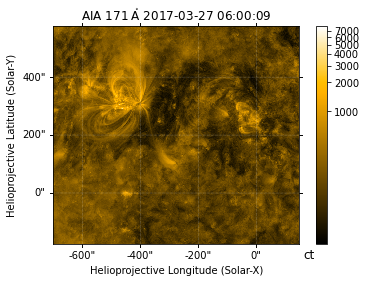

In [ ]:
m_cutout = m.submap(
    SkyCoord(-700*u.arcsec, -175*u.arcsec, frame=m.coordinate_frame),
    top_right=SkyCoord(150*u.arcsec, 575*u.arcsec, frame=m.coordinate_frame),
)
m_cutout.peek()

## Parker Solar Probe

NASA's [Parker Solar Probe](https://www.nasa.gov/content/goddard/parker-solar-probe-humanity-s-first-visit-to-a-star) mission is revolutionizing our understanding of the Sun, where changing conditions can propagate out into the solar system, affecting Earth and other worlds. Parker Solar Probe travels through the Sun’s atmosphere, closer to the surface than any spacecraft before it, facing brutal heat and radiation conditions to provide humanity with the closest-ever observations of a star.

Load and plot PSP FIELDS data (note: this example came from the team's IDL crib sheet):

In [13]:
time_range = ['2019-04-03', '2019-04-03/12:00']

pyspedas.projects.psp.fields(datatype='mag_rtn_4_sa_per_cyc',
                    trange=time_range,
                    time_clip=True)
pyspedas.projects.psp.fields(datatype='rfs_hfr',
                    varnames='psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)
pyspedas.projects.psp.fields(datatype='rfs_lfr',
                    varnames='psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2',
                    trange=time_range,
                    time_clip=True)

10-Jan-25 11:16:59: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
10-Jan-25 11:16:59: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
10-Jan-25 11:17:00: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn_4_per_cycle/2019/
10-Jan-25 11:17:04: File is current: psp_data/fields/l2/mag_rtn_4_per_cycle/2019/psp_fld_l2_mag_rtn_4_sa_per_cyc_20190403_v02.cdf
10-Jan-25 11:17:04: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/
10-Jan-25 11:17:05: File is current: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v03.cdf
10-Jan-25 11:17:05: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/rfs_hfr/2019/
10-Jan-25 11:17:06: File is current: psp_data/fields/l2/rfs_hfr/2019/psp_fld_l2_rfs_hfr_20190403_v03.cdf
10-Jan-25 11:17:06: Downloading remote index: https://spdf.gsfc.na

['psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'psp_fld_l2_quality_flags']

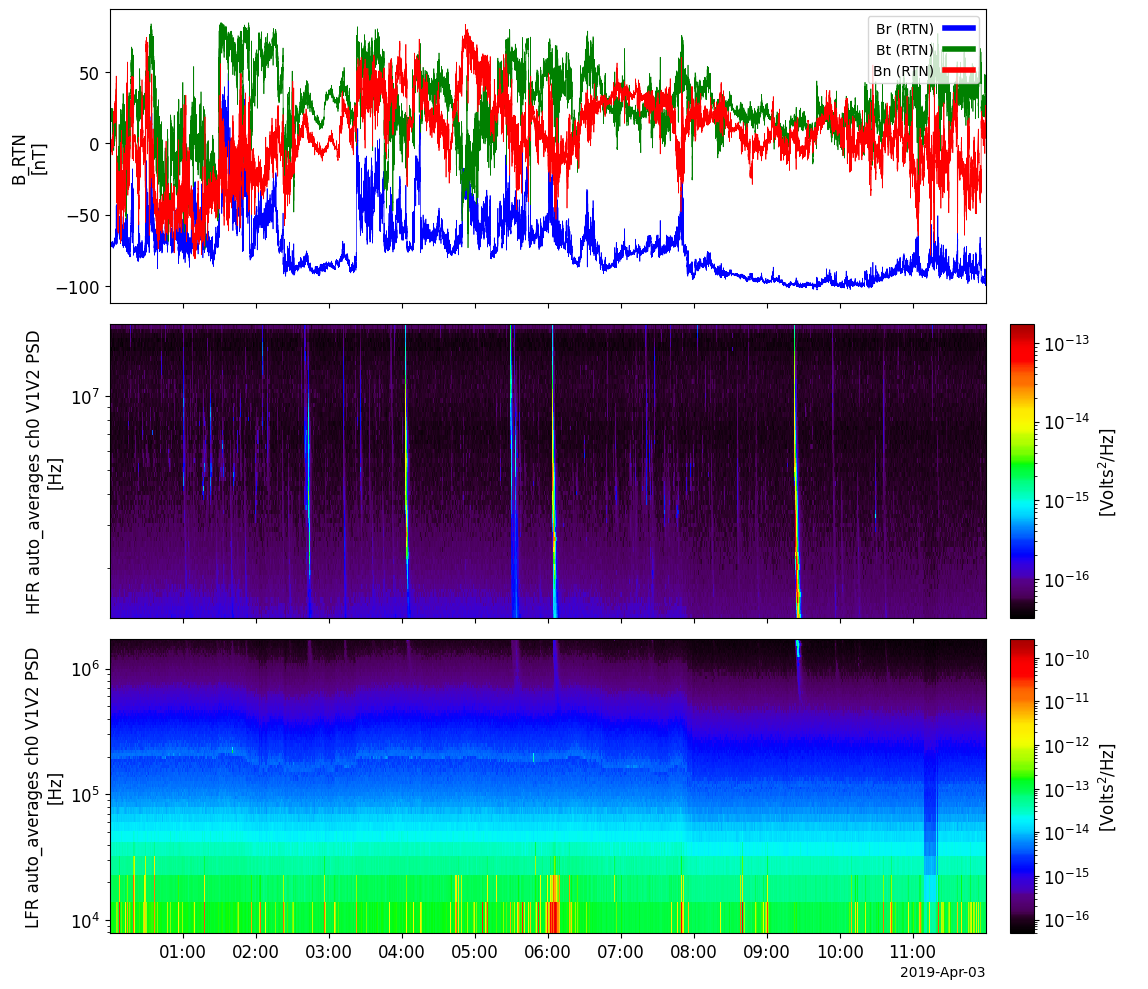

In [14]:
from pytplot import tplot, options

options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2', 'zlog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'ylog', True)
options('psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2', 'zlog', True)

tplot(['psp_fld_l2_mag_RTN_4_Sa_per_Cyc',
       'psp_fld_l2_rfs_hfr_auto_averages_ch0_V1V2',
       'psp_fld_l2_rfs_lfr_auto_averages_ch0_V1V2'], ysize=12)

## Solar Orbiter

[Solar Orbiter](https://www.nasa.gov/content/solar-orbiter-science) is a space mission of international collaboration between ESA and NASA to study the Sun, its outer atmosphere and what drives the constant outflow of solar wind that affects Earth. 

In [15]:
pyspedas.projects.solo.mag(trange=['2020-07-22', '2020-07-23'])


10-Jan-25 11:17:16: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/
10-Jan-25 11:17:17: Downloading https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200722_v03.cdf to solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200722_v03.cdf
10-Jan-25 11:17:24: Download complete: solar_orbiter_data/mag/science/l2/rtn-normal/2020/solo_l2_mag-rtn-normal_20200722_v03.cdf


['B_RTN']

In [16]:
pyspedas.projects.solo.swa(trange=['2020-07-22', '2020-07-23'], datatype='pas-eflux')

10-Jan-25 11:17:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/swa/science/l2/pas-eflux/2020/
10-Jan-25 11:17:40: Downloading https://spdf.gsfc.nasa.gov/pub/data/solar-orbiter/swa/science/l2/pas-eflux/2020/solo_l2_swa-pas-eflux_20200722_v02.cdf to solar_orbiter_data/swa/science/l2/pas-eflux/2020/solo_l2_swa-pas-eflux_20200722_v02.cdf
10-Jan-25 11:17:43: Download complete: solar_orbiter_data/swa/science/l2/pas-eflux/2020/solo_l2_swa-pas-eflux_20200722_v02.cdf


['unrecovered_count', 'total_count', 'quality_factor', 'eflux']

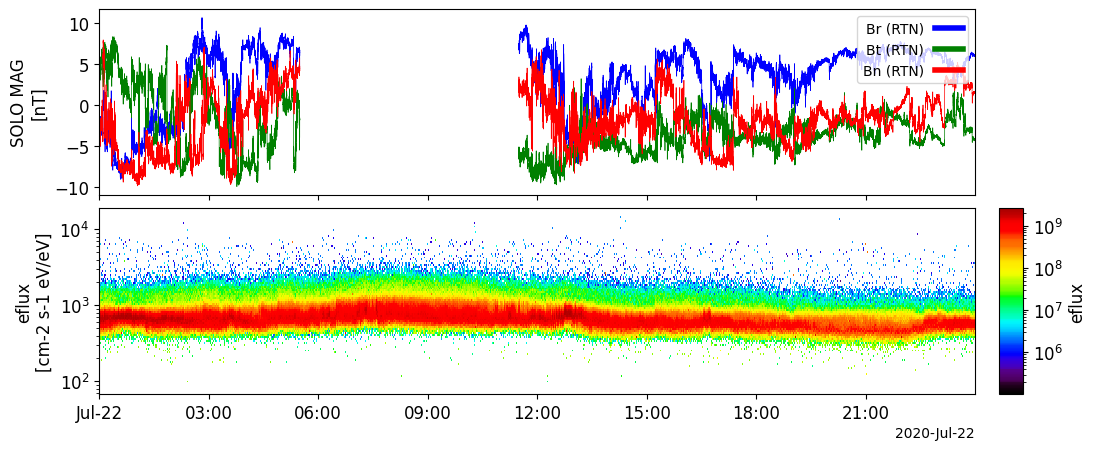

In [17]:
tplot(['B_RTN', 'eflux'])

## Advanced Composition Explorer (ACE)

The [Advanced Composition Explorer](https://www.nasa.gov/ace), or ACE, observes and measures magnetic fields and particles in space, from a vantage point approximately 1/100 of the distance from Earth to the Sun.

In [18]:
mfi_vars = pyspedas.projects.ace.mfi(trange=trange)
swe_vars = pyspedas.projects.ace.swe(trange=trange)

10-Jan-25 11:17:56: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2017/
10-Jan-25 11:17:57: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf to ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf
10-Jan-25 11:18:00: Download complete: ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20170327_v02.cdf
10-Jan-25 11:18:01: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2017/
10-Jan-25 11:18:02: Downloading https://spdf.gsfc.nasa.gov/pub/data/ace/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf to ace_data/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf
10-Jan-25 11:18:02: Download complete: ace_data/swepam/level_2_cdaweb/swe_h0/2017/ac_h0_swe_20170327_v11.cdf


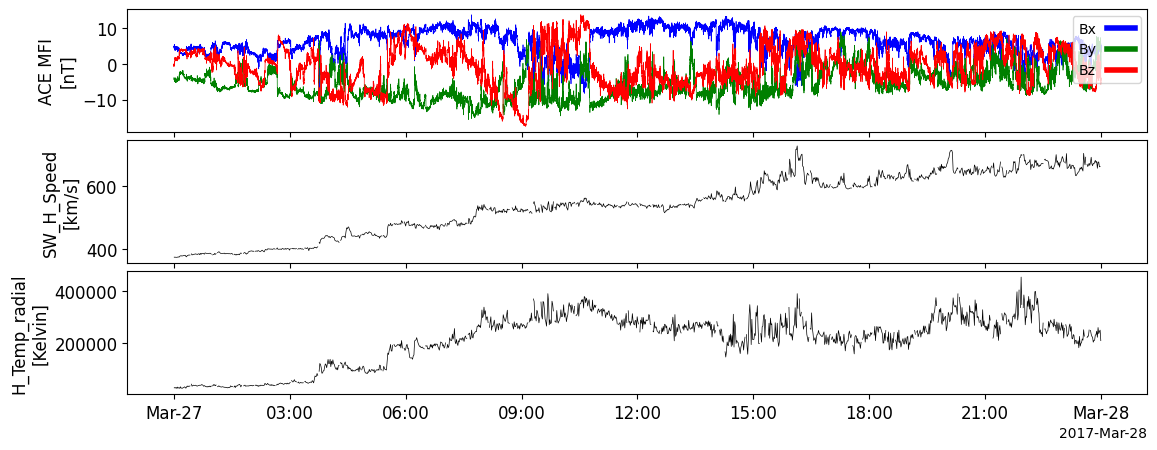

In [19]:
tplot(['BGSEc', 'Vp', 'Tpr'])

## Deep Space Climate Observatory (DSCOVR)

The [Deep Space Climate Observatory](https://www.nesdis.noaa.gov/current-satellite-missions/currently-flying/dscovr-deep-space-climate-observatory), or DSCOVR, was launched in February of 2015, and maintains the nation's real-time solar wind monitoring capabilities, which are critical to the accuracy and lead time of NOAA's space weather alerts and forecasts. 

In [20]:
mag_vars = pyspedas.projects.dscovr.mag(trange=trange)
orb_vars = pyspedas.projects.dscovr.orb(trange=trange)

10-Jan-25 11:18:10: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2017/
10-Jan-25 11:18:12: Downloading https://spdf.gsfc.nasa.gov/pub/data/dscovr/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf to dscovr_data/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf
10-Jan-25 11:18:16: Download complete: dscovr_data/h0/mag/2017/dscovr_h0_mag_20170327_v01.cdf
10-Jan-25 11:18:17: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/dscovr/orbit/pre_or/2017/
10-Jan-25 11:18:18: Downloading https://spdf.gsfc.nasa.gov/pub/data/dscovr/orbit/pre_or/2017/dscovr_orbit_pre_20170327_v06.cdf to dscovr_data/orbit/pre_or/2017/dscovr_orbit_pre_20170327_v06.cdf
10-Jan-25 11:18:18: Download complete: dscovr_data/orbit/pre_or/2017/dscovr_orbit_pre_20170327_v06.cdf


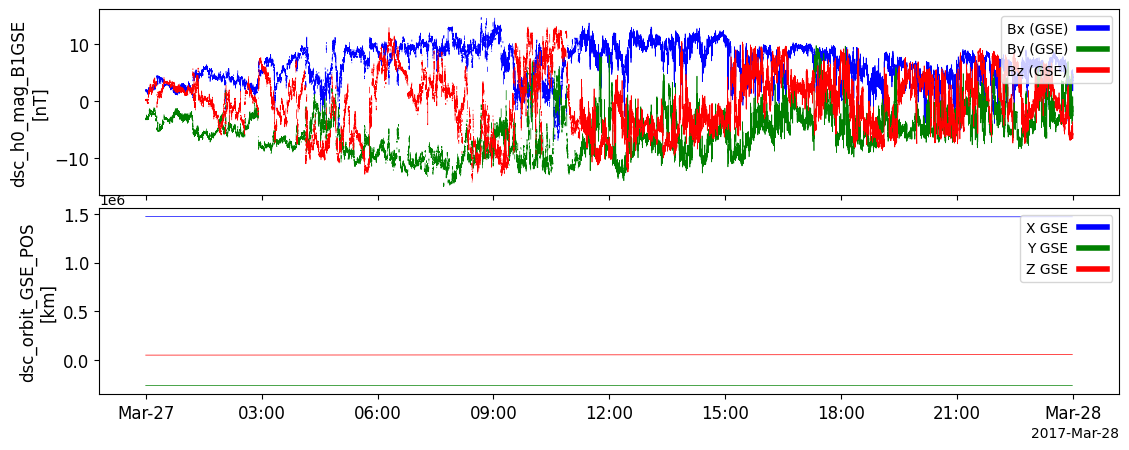

In [21]:
tplot(['dsc_h0_mag_B1GSE', 'dsc_orbit_GSE_POS'])

## Solar Terrestrial Relations Observatory (STEREO)

The [Solar TErrestrial RElations Observatory](https://www.nasa.gov/directorates/heo/scan/services/missions/solarsystem/STEREO.html) (STEREO) consists of two nearly identical spacecraft that seek to establish a one-to-one cause and effect relationship between coronal mass ejections as seen at the sun, the acceleration of particles in interplanetary space, and terrestrial consequences.

In [22]:
mag_vars = pyspedas.projects.stereo.mag(trange=trange)
plastic_vars = pyspedas.projects.stereo.plastic(trange=trange)

10-Jan-25 11:18:27: Downloading remote index: http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2017/03/
10-Jan-25 11:18:27: Downloading http://sprg.ssl.berkeley.edu/data/misc/stereo/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf to stereo_data/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf
10-Jan-25 11:18:39: Download complete: stereo_data/impact/level1/ahead/mag/RTN/2017/03/STA_L1_MAG_RTN_20170327_V06.cdf
10-Jan-25 11:18:46: Downloading remote index: http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/
10-Jan-25 11:18:53: Downloading http://stereo-ssc.nascom.nasa.gov/data/ins_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf to stereo_data/plastic/level2/Protons/Derived_from_1D_Maxwellian/ahead/1min/2017/STA_L2_PLA_1DMax_1min_20170327_V11.cdf
10-Jan-25 11:18:53: Download complete: stereo_data/plasti

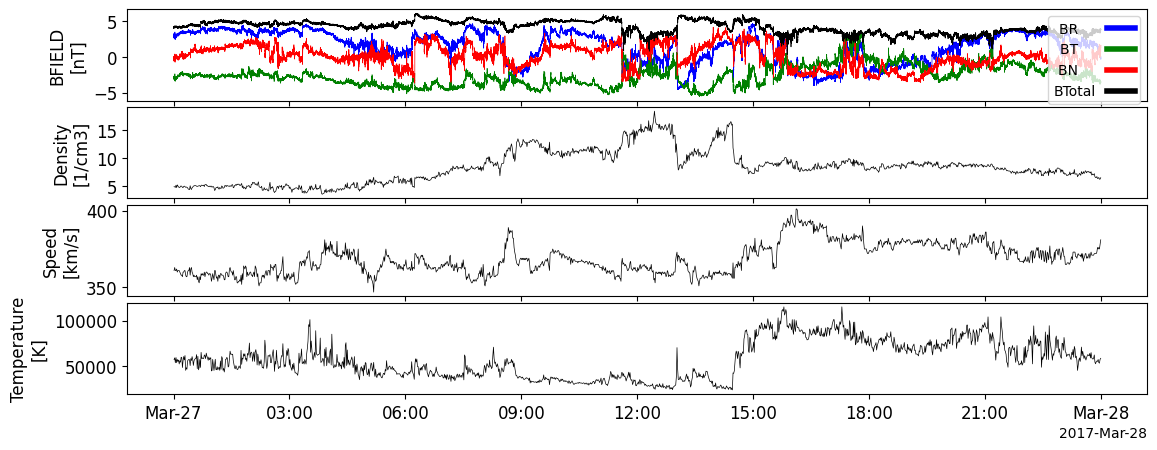

In [23]:
tplot(['BFIELD', 'proton_number_density', 'proton_bulk_speed', 'proton_temperature'])

## Mars Atmosphere and Volatile Evolution (MAVEN)

The [Mars Atmosphere and Volatile EvolutioN](https://www.nasa.gov/mission_pages/maven/overview/index.html) (MAVEN) mission is part of NASA's Mars Scout program. Launched in Nov. 2013, the mission explores the Red Planet’s upper atmosphere, ionosphere and interactions with the sun and solar wind.

In [24]:
mag_vars = pyspedas.projects.maven.mag(trange=trange, spdf=True)
swe_vars = pyspedas.projects.maven.swea(trange=trange, spdf=True)
swi_vars = pyspedas.projects.maven.swia(trange=trange, spdf=True)

10-Jan-25 11:19:35: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/maven/mag/l2/sunstate-1sec/cdfs/2017/03/
10-Jan-25 11:19:36: Downloading https://spdf.gsfc.nasa.gov/pub/data/maven/mag/l2/sunstate-1sec/cdfs/2017/03/mvn_mag_l2-sunstate-1sec_20170327_v01_r01.cdf to maven/mag/l2/sunstate-1sec/cdfs/2017/03/mvn_mag_l2-sunstate-1sec_20170327_v01_r01.cdf
10-Jan-25 11:19:37: Download complete: maven/mag/l2/sunstate-1sec/cdfs/2017/03/mvn_mag_l2-sunstate-1sec_20170327_v01_r01.cdf
10-Jan-25 11:19:37: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/maven/swea/l2/svyspec/2017/03/
10-Jan-25 11:19:38: Downloading https://spdf.gsfc.nasa.gov/pub/data/maven/swea/l2/svyspec/2017/03/mvn_swe_l2_svyspec_20170327_v05_r01.cdf to maven/swea/l2/svyspec/2017/03/mvn_swe_l2_svyspec_20170327_v05_r01.cdf
10-Jan-25 11:19:58: Download complete: maven/swea/l2/svyspec/2017/03/mvn_swe_l2_svyspec_20170327_v05_r01.cdf
10-Jan-25 11:19:58: Downloading remote index: https://spdf.gsfc.nasa.gov/pub

In [25]:
swi_vars

['spectra_diff_en_fluxes']

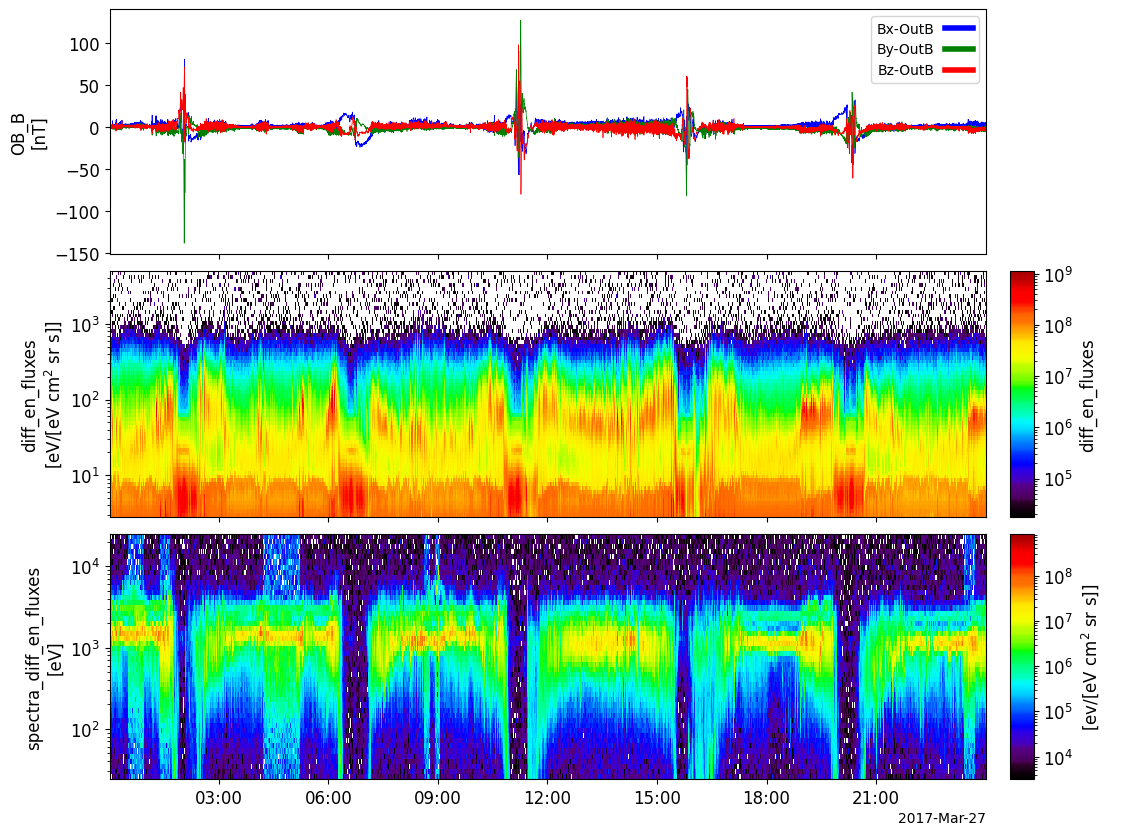

In [26]:
options('spectra_diff_en_fluxes', 'ylog', True)
options('spectra_diff_en_fluxes', 'zlog', True)
options('diff_en_fluxes', 'ylog', True)
options('diff_en_fluxes', 'zlog', True)
options('diff_en_fluxes', 'spec', True)

tplot(['OB_B', 'diff_en_fluxes', 'spectra_diff_en_fluxes'], ysize=10)

## OMNI 

Solar wind [magnetic field and plasma data](https://omniweb.gsfc.nasa.gov/index.html) at Earth's Bow Shock Nose (BSN), also geomagnetic activity indices and energetic proton fluxes.

In [27]:
omni_vars = pyspedas.projects.omni.data(trange=['2017-03-01', '2017-04-01'], time_clip=False)

10-Jan-25 11:36:43: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2017/
10-Jan-25 11:36:45: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf to omni_data/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf
10-Jan-25 11:36:51: Download complete: omni_data/hro2_1min/2017/omni_hro2_1min_20170301_v01.cdf


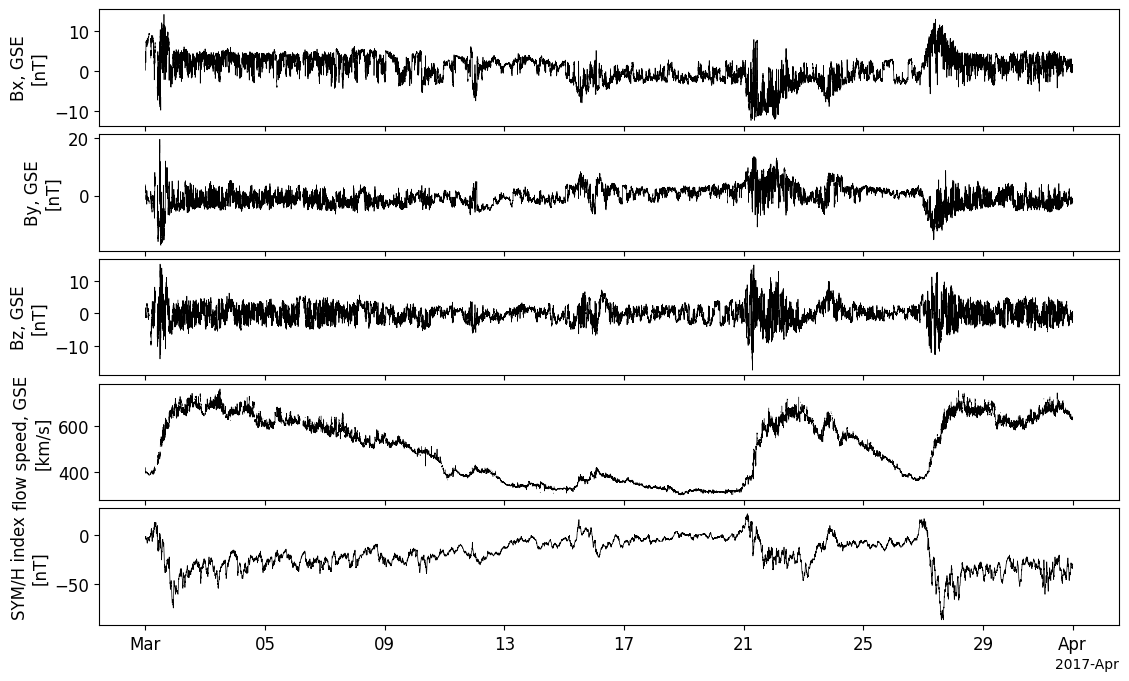

In [28]:
tplot(['BX_GSE', 'BY_GSE', 'BZ_GSE', 'flow_speed', 'SYM_H'])

## Kyoto Dst

The hourly Dst index, from the [WDC for Geomagnetism](https://wdc.kugi.kyoto-u.ac.jp/dstdir/), Kyoto, Japan; useful indicator of geomagnetic storm intensity

In [29]:
dst_vars = pyspedas.projects.kyoto.dst(trange=['2017-03-01', '2017-04-01'])

10-Jan-25 11:36:53: Downloading http://wdc.kugi.kyoto-u.ac.jp/dst_final/201703/index.html to pydata/geom_indices/kyoto/dst_final/201703/index.html
10-Jan-25 11:36:53: Download complete: pydata/geom_indices/kyoto/dst_final/201703/index.html
10-Jan-25 11:36:53: 
            ******************************
            The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
            are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
            the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
            [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
            make the Dst index available.
            ******************************
        


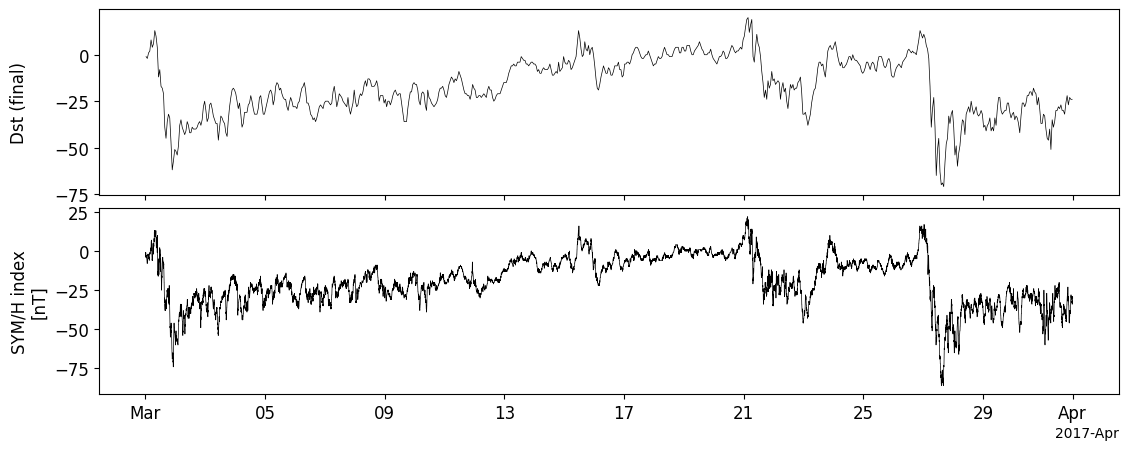

In [30]:
tplot(['kyoto_dst', 'SYM_H'])

## Geotail

The [Geotail](https://solarsystem.nasa.gov/missions/geotail/in-depth/) mission was a joint project of Japan’s Institute of Space and Astronautical Science (ISAS) and later, from 2003, the Japan Aerospace Exploration Agency (JAXA) and NASA. 


Geotail’s goal was to study the structure and dynamics of the long tail region of Earth’s magnetosphere, which is created on the nightside of Earth by the solar wind. During active periods, the tail couples with the near-Earth magnetosphere, and often releases energy that is stored in the tail, activating auroras in the polar ionosphere.

In [31]:
mgf_vars = pyspedas.geotail.mgf(trange=trange)
cpi_vars = pyspedas.geotail.cpi(trange=trange)

10-Jan-25 11:37:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/mgf/mgf_k0/2017/
10-Jan-25 11:37:10: Downloading https://spdf.gsfc.nasa.gov/pub/data/geotail/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf to geotail_data/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf
10-Jan-25 11:37:11: Download complete: geotail_data/mgf/mgf_k0/2017/ge_k0_mgf_20170327_v01.cdf
10-Jan-25 11:37:11: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/geotail/cpi/cpi_k0/2017/
10-Jan-25 11:37:13: Downloading https://spdf.gsfc.nasa.gov/pub/data/geotail/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf to geotail_data/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf
10-Jan-25 11:37:13: Download complete: geotail_data/cpi/cpi_k0/2017/ge_k0_cpi_20170327_v01.cdf
10-Jan-25 11:37:13: Unable to get DEPEND_1 variable cartesian3 while processing SW_V
10-Jan-25 11:37:13: Unable to get DEPEND_1 variable cartesian2 while processing HP_V
10-Jan-25 11:37:13: store_data: Length of spec_bins (1) and times (106

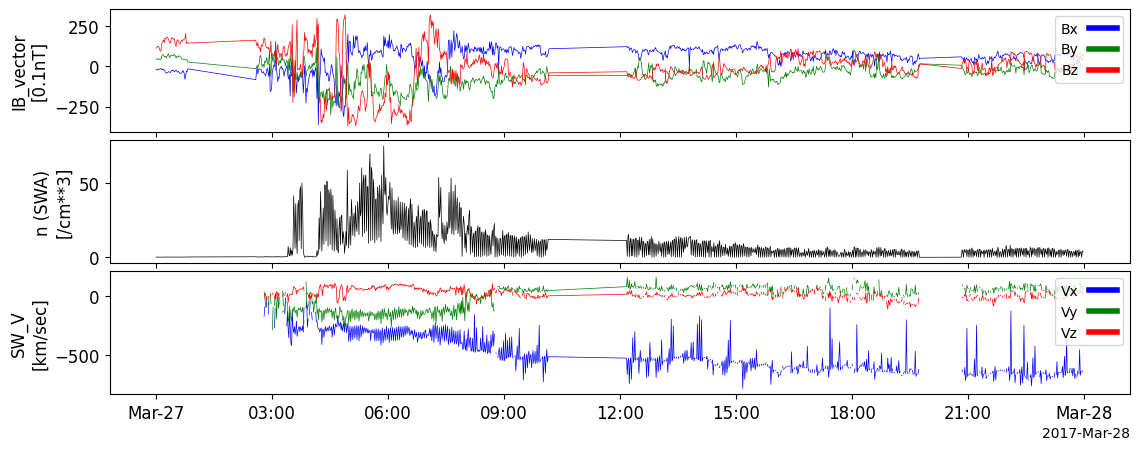

In [32]:
tplot(['IB_vector', 'SW_P_Den', 'SW_V'])

## Magnetospheric Multiscale (MMS)

The [Magnetospheric Multiscale](https://mms.gsfc.nasa.gov/) (MMS) mission studies the mystery of how magnetic fields around Earth connect and disconnect, explosively releasing energy via a process known a magnetic reconnection.

In [33]:
mec_vars = pyspedas.projects.mms.mec(trange=trange)
fgm_vars = pyspedas.projects.mms.fgm(trange=trange)
feeps_vars = pyspedas.projects.mms.feeps(trange=trange)

10-Jan-25 11:37:38: Downloading mms1_mec_srvy_l2_epht89q_20170327_v2.0.3.cdf to pydata/mms1/mec/srvy/l2/epht89q/2017/03
10-Jan-25 11:38:00: Downloading mms1_fgm_srvy_l2_20170327_v5.89.0.cdf to pydata/mms1/fgm/srvy/l2/2017/03
10-Jan-25 11:39:31: Downloading mms1_feeps_srvy_l2_electron_20170327000000_v7.1.1.cdf to pydata/mms1/feeps/srvy/l2/electron/2017/03
10-Jan-25 11:44:26: Integer data values for variable mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_1 are all fillval (-2147483648).
10-Jan-25 11:44:26: Integer data values for variable mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_2 are all fillval (-2147483648).
10-Jan-25 11:44:26: Integer data values for variable mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_9 are all fillval (-2147483648).
10-Jan-25 11:44:26: Integer data values for variable mms1_epd_feeps_srvy_l2_electron_top_quality_indicator_sensorid_10 are all fillval (-2147483648).
10-Jan-25 11:44:26: Integer data values for va

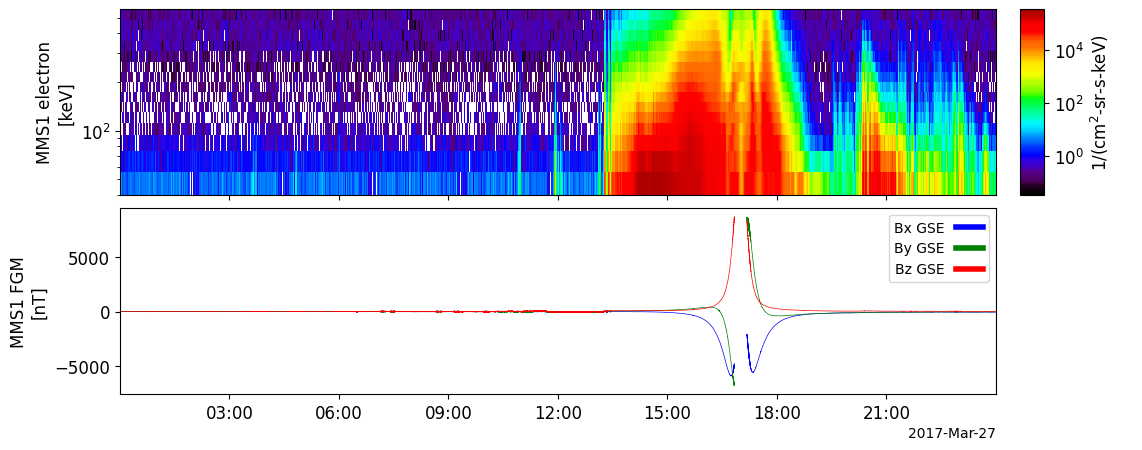

In [34]:
tplot(['mms1_epd_feeps_srvy_l2_electron_intensity_omni',
       'mms1_fgm_b_gse_srvy_l2_bvec'])

10-Jan-25 11:45:24: Downloading mms1_hpca_srvy_l2_ion_20170327060000_v4.1.0.cdf to pydata/mms1/hpca/srvy/l2/ion/2017/03
10-Jan-25 11:46:33: Variable mms1_hpca_hplus_data_quality has only 1 dimension (including time), but has a DEPEND_1 attribute. Removing attribute.
10-Jan-25 11:46:34: Variable mms1_hpca_heplus_data_quality has only 1 dimension (including time), but has a DEPEND_1 attribute. Removing attribute.
10-Jan-25 11:46:34: Variable mms1_hpca_heplusplus_data_quality has only 1 dimension (including time), but has a DEPEND_1 attribute. Removing attribute.
10-Jan-25 11:46:34: Variable mms1_hpca_oplus_data_quality has only 1 dimension (including time), but has a DEPEND_1 attribute. Removing attribute.
10-Jan-25 11:46:35: wildcard_expand: No match found for mms1*_number_density
10-Jan-25 11:46:35: wildcard_expand: No match found for mms1*_ion_bulk_velocity*
10-Jan-25 11:46:35: wildcard_expand: No match found for mms1*_scalar_temperature
10-Jan-25 11:46:35: No valid data in distributi

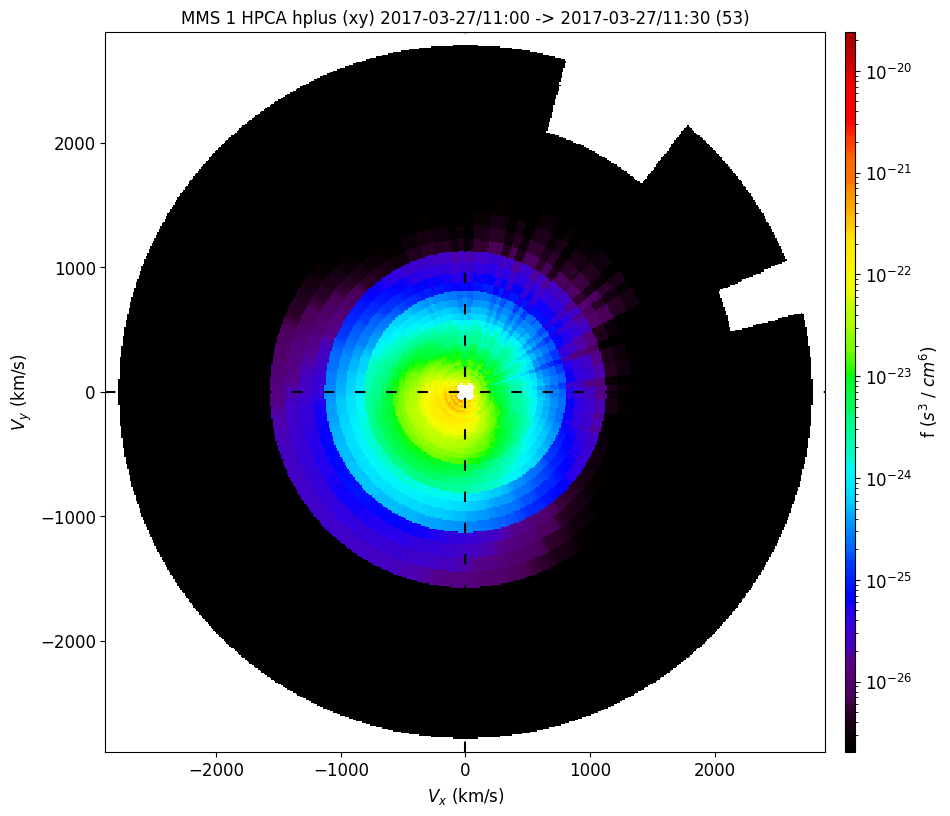

In [35]:
from pyspedas.projects.mms.particles.mms_part_slice2d import mms_part_slice2d

mms_part_slice2d(trange=['2017-03-27/11:00', '2017-03-27/11:30'], instrument='hpca', species='hplus')

## Cluster

Studying how the solar wind affects Earth, [Cluster](https://www.esa.int/Science_Exploration/Space_Science/Cluster_overview2) spacecraft pass in and out of our planet's magnetic field to make a detailed investigation of how the Sun and Earth interact.

In [36]:
cl_vars = pyspedas.projects.cluster.fgm(trange=trange, probe=['1', '2', '3', '4'])

10-Jan-25 11:48:08: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/cluster/c1/up/fgm/2017/
10-Jan-25 11:48:11: Downloading https://spdf.gsfc.nasa.gov/pub/data/cluster/c1/up/fgm/2017/c1_up_fgm_20170327_v02.cdf to cluster_data/c1/up/fgm/2017/c1_up_fgm_20170327_v02.cdf
10-Jan-25 11:48:12: Download complete: cluster_data/c1/up/fgm/2017/c1_up_fgm_20170327_v02.cdf
10-Jan-25 11:48:12: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/cluster/c2/up/fgm/2017/
10-Jan-25 11:48:13: Downloading https://spdf.gsfc.nasa.gov/pub/data/cluster/c2/up/fgm/2017/c2_up_fgm_20170327_v02.cdf to cluster_data/c2/up/fgm/2017/c2_up_fgm_20170327_v02.cdf
10-Jan-25 11:48:14: Download complete: cluster_data/c2/up/fgm/2017/c2_up_fgm_20170327_v02.cdf
10-Jan-25 11:48:14: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/cluster/c3/up/fgm/2017/
10-Jan-25 11:48:14: Downloading https://spdf.gsfc.nasa.gov/pub/data/cluster/c3/up/fgm/2017/c3_up_fgm_20170327_v02.cdf to cluster_data/c3/up/fg

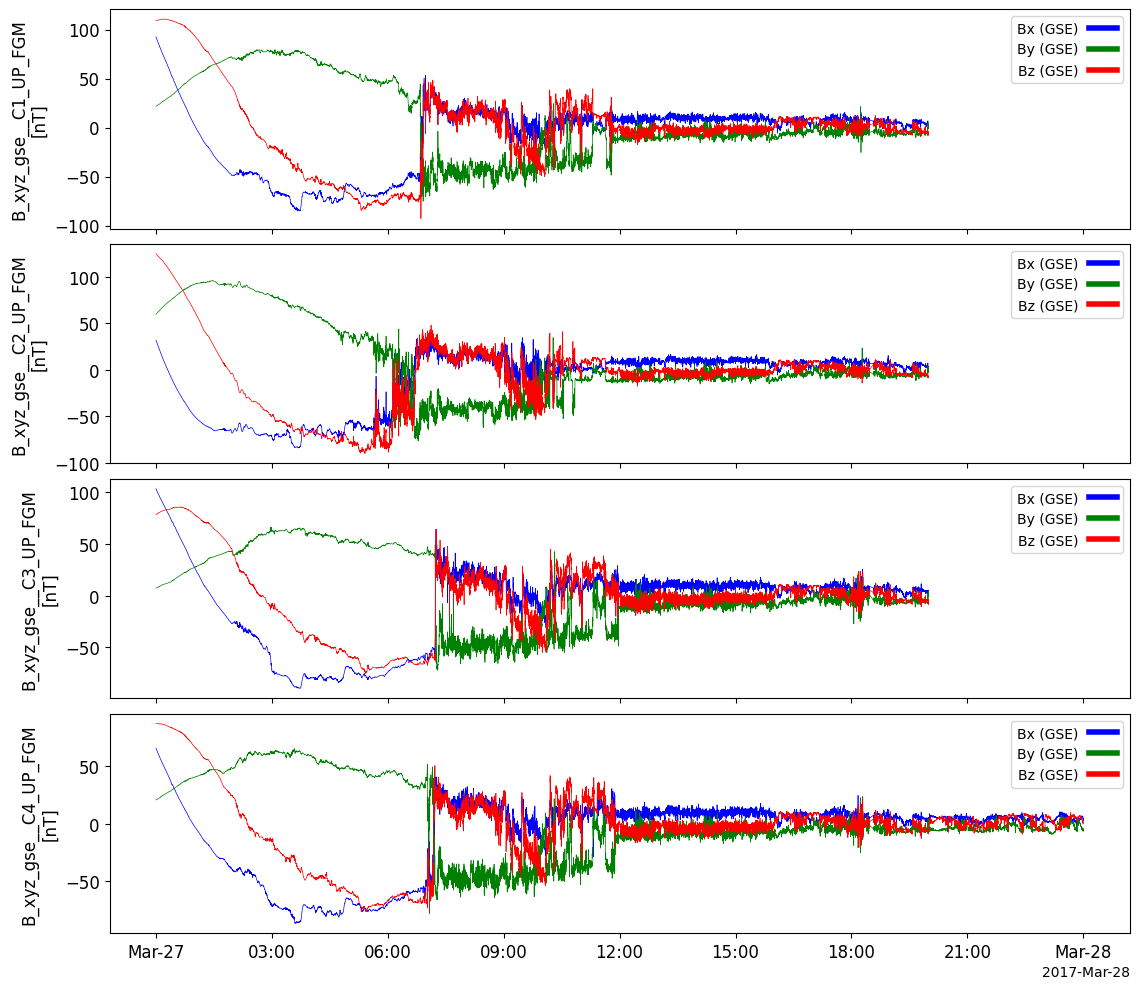

In [37]:
tplot('B_xyz_gse__C?_UP_FGM', ysize=12)

## Time History of Events and Macroscale Interactions during Substorms (THEMIS)

The [Time History of Events and Macroscale Interactions during Substorms](https://www.nasa.gov/mission_pages/themis/mission/index.html) —THEMIS — mission studies how mass and energy move through the near-Earth environment in order to determine the physical processes initiating auroras.

In [38]:
sta_vars = pyspedas.projects.themis.state(probe='d', trange=trange)
fgm_vars = pyspedas.projects.themis.fgm(probe='d', trange=trange)
gmom_vars = pyspedas.projects.themis.gmom(probe='d', trange=trange)

10-Jan-25 11:49:21: Downloading https://themis.ssl.berkeley.edu/data/themis/thd/l1/state/2017/thd_l1_state_20170327.cdf to themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf
10-Jan-25 11:49:23: Download complete: themis_data/thd/l1/state/2017/thd_l1_state_20170327.cdf
10-Jan-25 11:49:24: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2017/
10-Jan-25 11:49:26: Downloading https://themis.ssl.berkeley.edu/data/themis/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf to themis_data/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf
10-Jan-25 11:50:06: Download complete: themis_data/thd/l2/fgm/2017/thd_l2_fgm_20170327_v01.cdf
10-Jan-25 11:50:07: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thd/l2/gmom/2017/
10-Jan-25 11:50:07: Downloading https://themis.ssl.berkeley.edu/data/themis/thd/l2/gmom/2017/thd_l2_gmom_20170327_v01.cdf to themis_data/thd/l2/gmom/2017/thd_l2_gmom_20170327_v01.cdf
10-Jan-25 11:50:25: Download complete: themis_data/thd

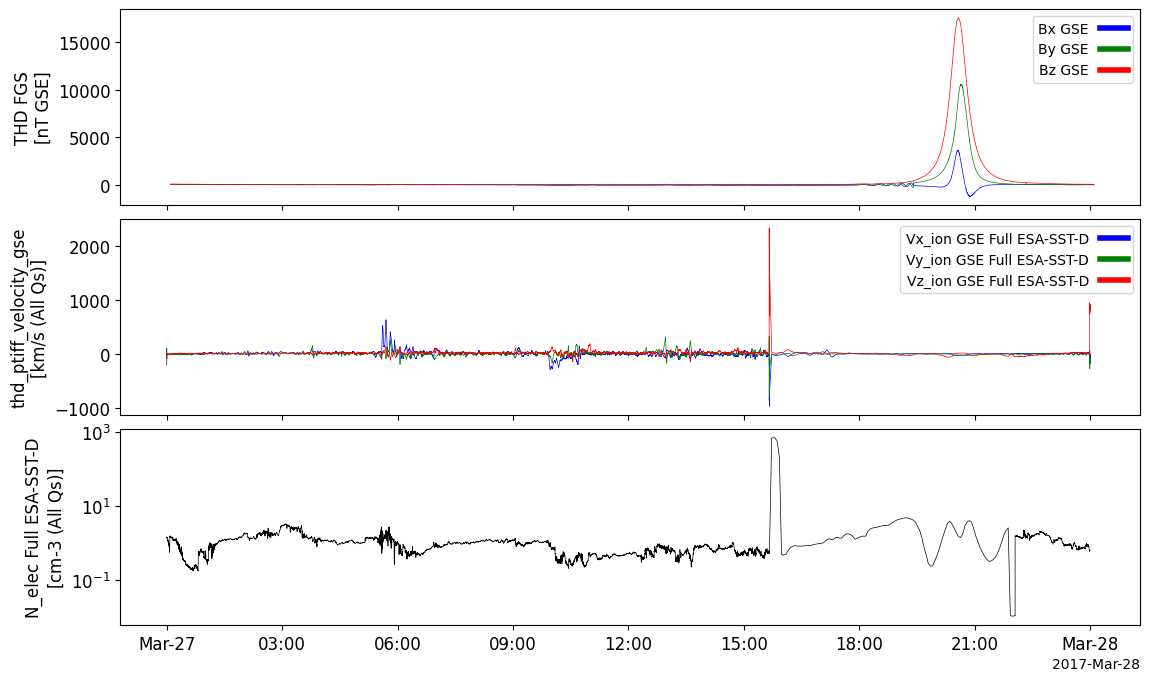

In [39]:
tplot(['thd_fgs_gse', 'thd_ptiff_velocity_gse', 'thd_pteff_density'], ysize=8)

## Van Allen Probes (formerly RBSP)

NASA's [Van Allen Probes](https://www.nasa.gov/mission_pages/rbsp/mission/index.html) mission was designed to help us understand the Sun’s influence on Earth and Near-Earth space by studying the Earth’s radiation belts on various scales of space and time.

In [40]:
emfisis_vars = pyspedas.projects.rbsp.emfisis(trange=['2017-03-27/15:00', '2017-03-27/16:00'],
                                     datatype='magnetometer', 
                                     level='l3', 
                                     time_clip=True)
efw_vars = pyspedas.projects.rbsp.efw(trange=['2017-03-27/15:00', '2017-03-27/16:00'],
                             level='l3',
                             time_clip=True)
rbspice_vars = pyspedas.projects.rbsp.rbspice(trange=['2017-03-27/15:00', '2017-03-27/16:00'],
                                     time_clip=True)

10-Jan-25 11:50:47: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/
10-Jan-25 11:50:48: Downloading https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf to rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf
10-Jan-25 11:50:49: Download complete: rbsp_data/rbspa/l3/emfisis/magnetometer/4sec/sm/2017/rbsp-a_magnetometer_4sec-sm_emfisis-l3_20170327_v1.7.2.cdf
10-Jan-25 11:50:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/efw/2017/
10-Jan-25 11:50:50: Downloading https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/efw/2017/rbspa_efw-l3_20170327_v04.cdf to rbsp_data/rbspa/l3/efw/2017/rbspa_efw-l3_20170327_v04.cdf
10-Jan-25 11:50:51: Download complete: rbsp_data/rbspa/l3/efw/2017/rbspa_efw-l3_20170327_v04.cdf
10-Jan-25 11:50:51: No VAR_TYPE or PARAMETE

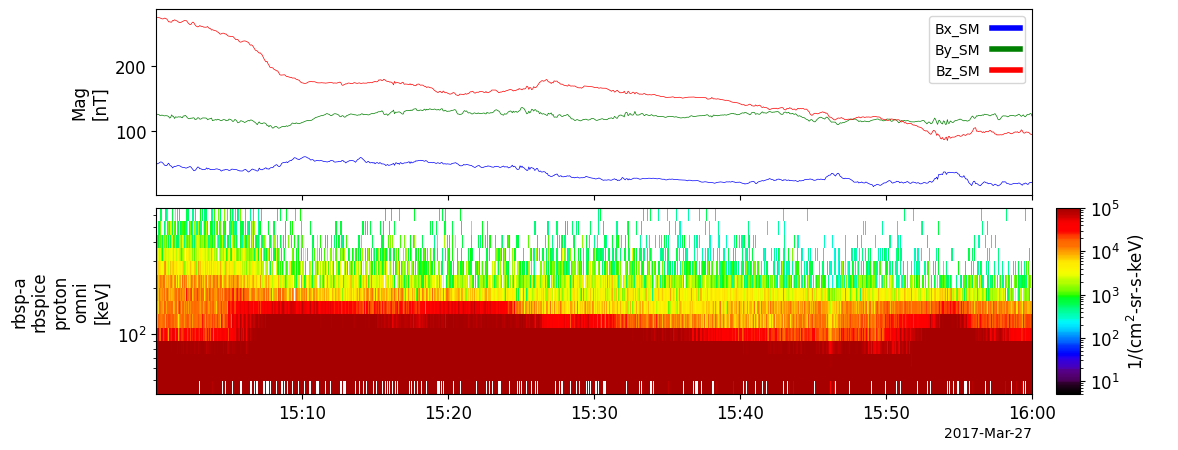

In [41]:
tplot(['Mag', 'rbspa_rbspice_l3_TOFxEH_proton_omni'])

## Arase

The [Arase](https://global.jaxa.jp/projects/sas/erg/) mission aims at elucidating how highly charged electrons have been born while they generate and vanish repeatedly along with space storms caused by the disturbance of solar wind caused by space storms, and how space storms are developed.



In [42]:
pyspedas.projects.erg.orb(trange=trange)
pyspedas.projects.erg.mgf(trange=trange)
pyspedas.projects.erg.mepe(trange=trange)
pyspedas.projects.erg.lepe(trange=trange)

10-Jan-25 11:54:10: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
10-Jan-25 11:54:13: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v04.cdf to erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v04.cdf
10-Jan-25 11:54:14: Download complete: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v04.cdf
10-Jan-25 11:54:14: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


10-Jan-25 11:54:17: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf to erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
10-Jan-25 11:54:20: Download complete: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
10-Jan-25 11:54:20: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data']

Information about ERG MGF

PI:  ['Ayako Matsuoka']
Affiliation:  ['Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Jan-25 11:54:21: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf to erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
10-Jan-25 11:54:22: Download complete: erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
10-Jan-25 11:54:22: Variable FEDO has only 2 dimensions (including time), but has a DEPEND_2 attribute. Removing attribute.
10-Jan-25 11:54:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data']

PI:  ['Satoshi Kasahara']
Affiliation:  ['The University of Tokyo']

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************


10-Jan-25 11:54:23: Downloading https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v04_01.cdf to erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v04_01.cdf
10-Jan-25 11:54:24: Download complete: erg_data/satellite/erg/lepe/l2/omniflux/2017/03/erg_lepe_l2_omniflux_20170327_v04_01.cdf
10-Jan-25 11:54:24: Variable FEDO DEPEND_1 attribute FEDO_Energy has too many dimensions (3). Keeping extra dimensions (for now).


 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Low-Energy Particle experiments - electron analyzer (LEP-e) Level 2 omni electron flux data']

Information about ERG LEPe

PI:  ['Shiang-Yu Wang']
Affiliation:  ['Academia Sinica, Taiwan']

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of LEPe L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Lepe

Contact: erg_lepe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_lepe_l2_omniflux_FEDO']

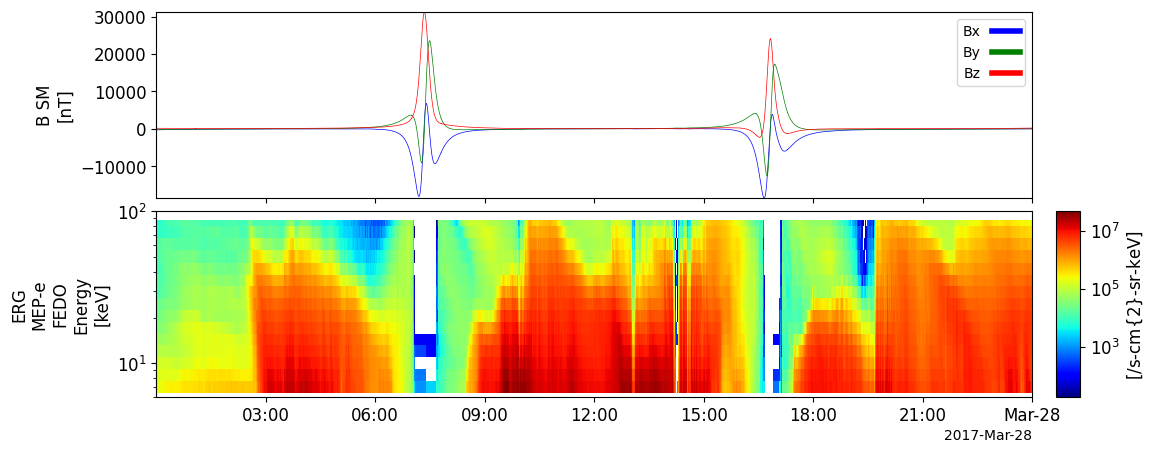

In [43]:
tplot(['erg_mgf_l2_mag_8sec_sm', 
       'erg_mepe_l2_omniflux_FEDO'])

## Geopack (Tsyganenko field models)

In [44]:
from pyspedas.geopack import tt89

Load IGRF coefficients ...


In [45]:
# convert the Arase position data to km (from Re)
from pyspedas import tkm2re
tkm2re('erg_orb_l2_pos_gsm', km=True)

tt89('mms1_mec_r_gsm')
tt89('thd_pos_gsm')
tt89('erg_orb_l2_pos_gsm_km')

'erg_orb_l2_pos_gsm_km_bt89'

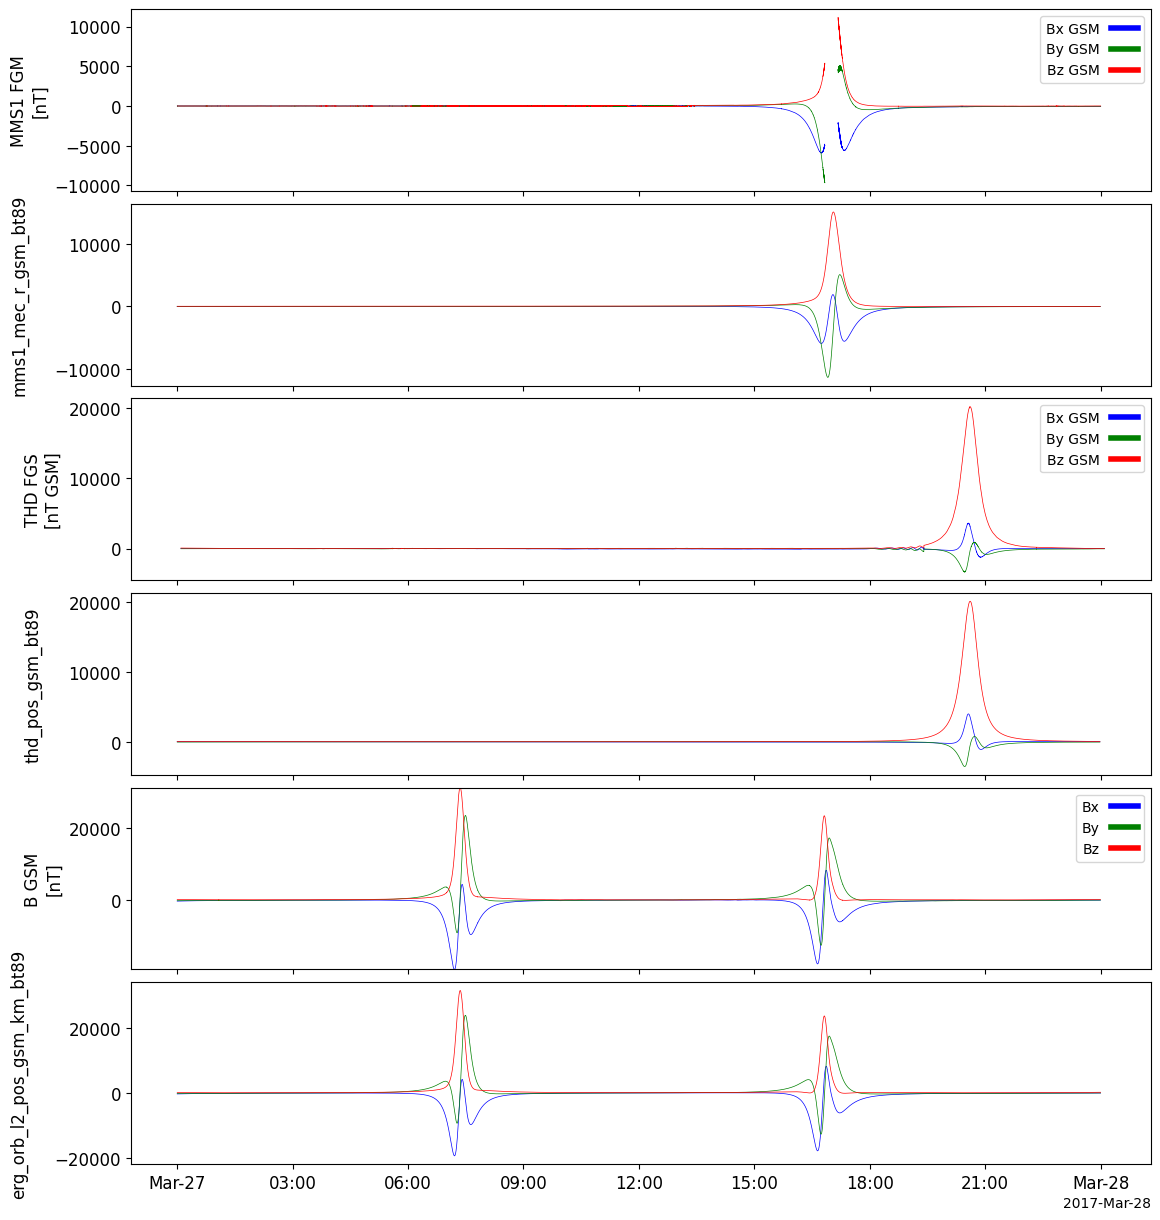

In [46]:
tplot(['mms1_fgm_b_gsm_srvy_l2_bvec', # MMS measured field
       'mms1_mec_r_gsm_bt89', # T89 at the MMS1 position
       'thd_fgs_gsm', # THEMIS measured field
       'thd_pos_gsm_bt89', # T89 at the THEMIS-c position
       'erg_mgf_l2_mag_8sec_gsm', # ERG measured field
       'erg_orb_l2_pos_gsm_km_bt89'], ysize=15) # T89 at the ERG position

## Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)

The identical [TWINS-A and TWINS-B observatories](http://science.nasa.gov/missions/twins/) provide a new capability for stereoscopically imaging the magnetosphere

In [47]:
lad_vars = pyspedas.projects.twins.lad(trange=trange)
eph_vars = pyspedas.projects.twins.ephemeris(trange=trange)

10-Jan-25 11:56:12: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/lad/2017/
10-Jan-25 11:56:13: Downloading https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf to twins_data/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf
10-Jan-25 11:56:14: Download complete: twins_data/twins1/lad/2017/twins1_l1_lad_20170327_v01.cdf
10-Jan-25 11:56:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/ephemeris/or/2017/
10-Jan-25 11:56:17: Downloading https://spdf.gsfc.nasa.gov/pub/data/twins/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf to twins_data/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf
10-Jan-25 11:56:17: Download complete: twins_data/twins1/ephemeris/or/2017/twins1_or_def_20170327_v01.cdf


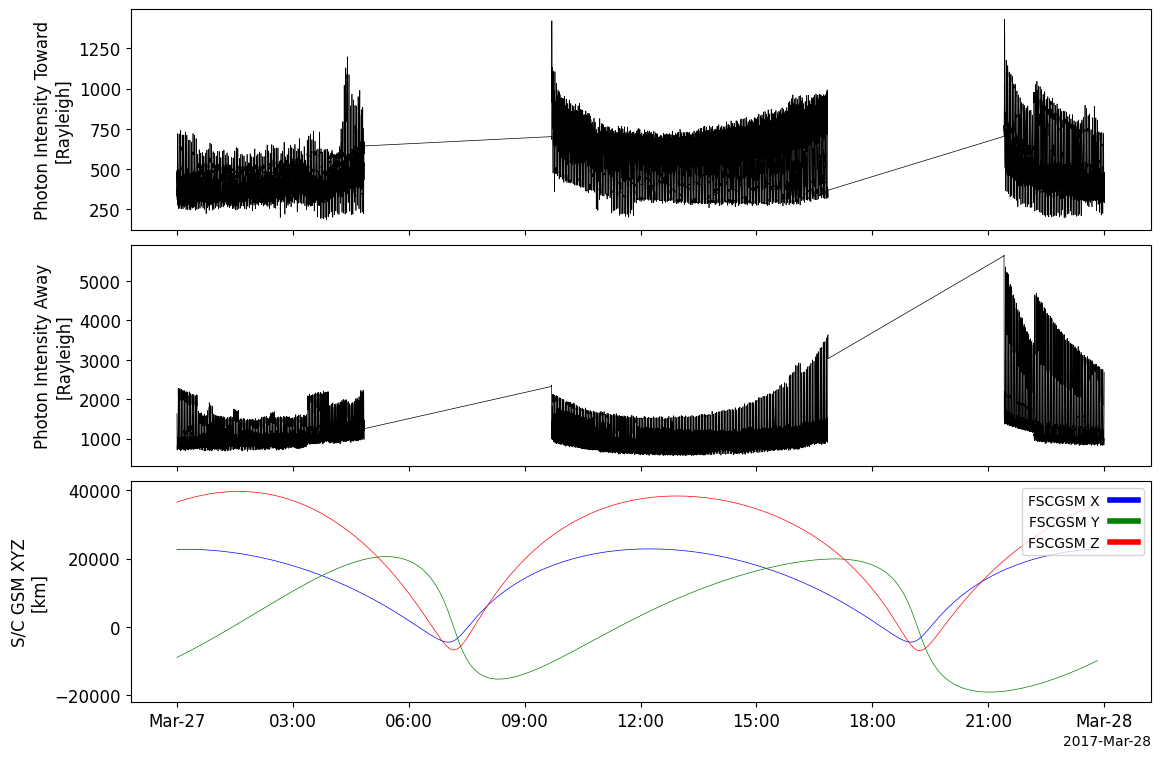

In [48]:
tplot(['lad1_data', 'lad2_data', 'FSCGSM'], ysize=9)

## Polar Operational Environmental Satellites (POES)

In [49]:
sem_vars = pyspedas.projects.poes.sem(trange=['2017-03-27', '2017-03-28'])

10-Jan-25 11:56:25: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2017/
10-Jan-25 11:56:28: Downloading https://spdf.gsfc.nasa.gov/pub/data/noaa/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf to poes_data/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf
10-Jan-25 11:56:37: Download complete: poes_data/noaa19/sem2_fluxes-2sec/2017/noaa19_poes-sem2_fluxes-2sec_20170327_v01.cdf


In [50]:
options('ted_pro_tel0_low_eflux', 'ylog', False)
options('ted_pro_tel30_low_eflux', 'ylog', False)

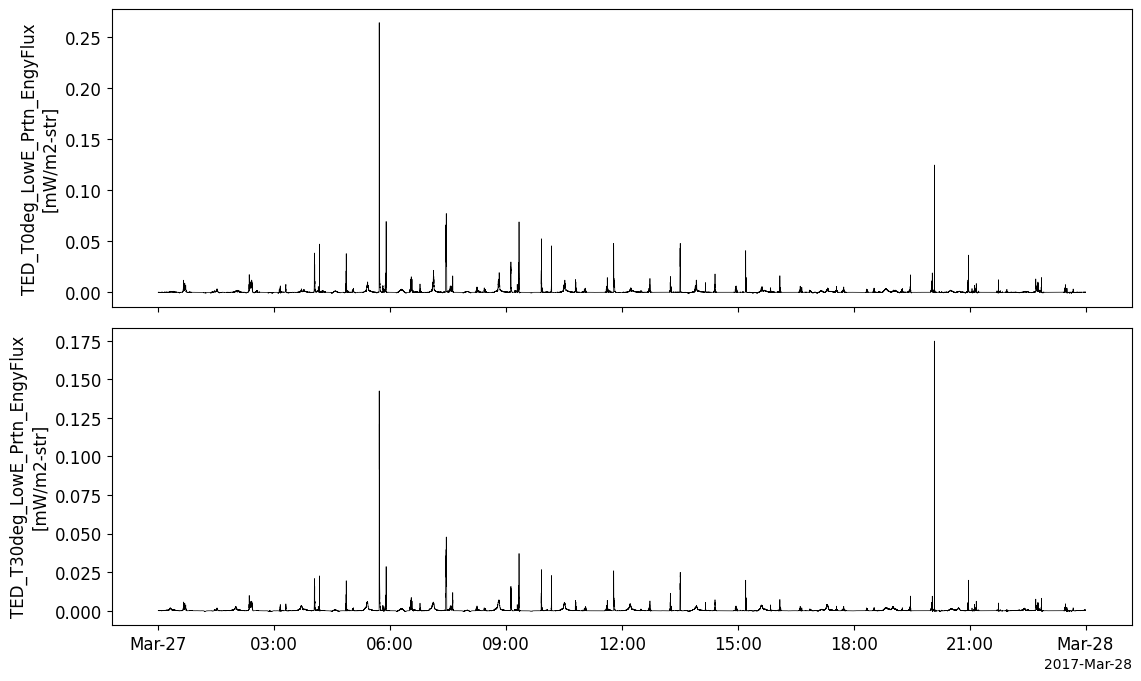

In [51]:
from pytplot import tplot
tplot('ted_pro_tel*_low_eflux', ysize=8)

## Swarm

In [52]:
swarm_vars = pyspedas.projects.swarm.mag(trange=['2017-03-27/06:00', '2017-03-27/08:00'])

10-Jan-25 11:58:11: /Users/jwl/PycharmProjects/pyspedas_examples/venv/lib/python3.9/site-packages/pytplot/MPLPlotter/tplot.py:703: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs={'fill_value': 'extrapolate', 'bounds_error': False}).values))

10-Jan-25 11:58:11: /Users/jwl/PycharmProjects/pyspedas_examples/venv/lib/python3.9/site-packages/pytplot/MPLPlotter/tplot.py:703: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, 

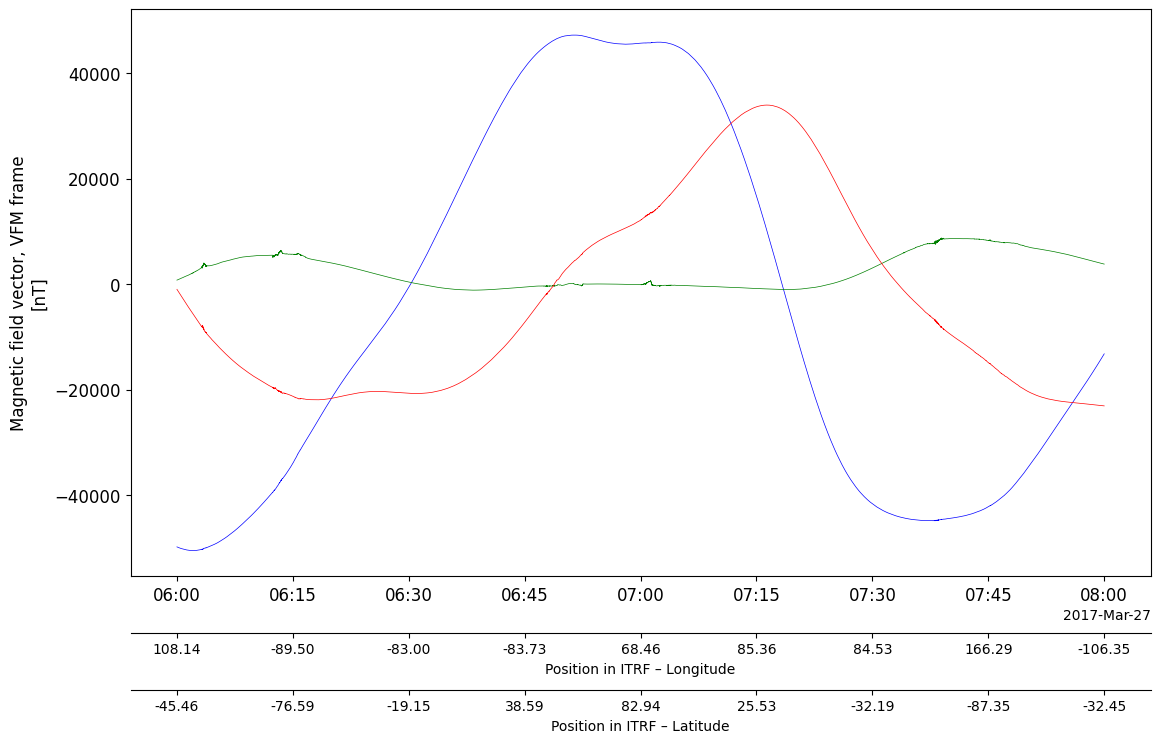

In [53]:
tplot('swarma_B_VFM', var_label=['swarma_Longitude', 'swarma_Latitude'], ysize=9)

## Spherical Elementary Currents (SECS)

In [54]:
from pyspedas.projects.secs.makeplots import make_plots

# set your content directory for SECS/EICS data
from pyspedas.projects.secs.config import CONFIG
CONFIG['plots_dir'] = '/content/'

10-Jan-25 11:58:49: <frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject



In [55]:
pyspedas.projects.secs.data(trange=trange,
                   resolution=10,
                   dtype='SECS', 
                   no_download=False, 
                   downloadonly=False, 
                   out_type='df')

10-Jan-25 11:58:55: Downloading http://vmo.igpp.ucla.edu/data1/SECS/SECS/2017/03/SECS20170327.zip to secs_data/SECS/2017/03/SECS20170327.zip
10-Jan-25 11:59:46: Download complete: secs_data/SECS/2017/03/SECS20170327.zip
10-Jan-25 11:59:46: Start unzipping: secs_data/SECS/2017/03/SECS20170327.zip  ------
10-Jan-25 11:59:52: running time of output df: --- 4.183823823928833 seconds ---


latitude  longitude         J         datetime
0           58.30     189.70 -5564.820  20170327_000000
1           58.30     193.15 -5919.239  20170327_000000
2           58.30     196.60 -4668.270  20170327_000000
3           58.30     200.05 -2681.050  20170327_000000
4           58.30     203.50 -6654.440  20170327_000000
...           ...        ...       ...              ...
8743675     78.60     262.15  1427.663  20170327_235950
8743676     80.05     251.80  2885.517  20170327_235950
8743677     80.05     255.25  2442.346  20170327_235950
8743678     80.05     258.70  2059.269  20170327_235950
8743679     80.05     262.15  1728.893  20170327_235950

[8743680 rows x 4 columns]

In [56]:
make_plots(dtype='SECS', 
           dtime='2017-03-27/06:00:00', 
           vplot_sized=True, 
           contour_den=201, 
           s_loc=False, 
           quiver_scale=30)

OSError: [Errno 30] Read-only file system: '/content/'

## Equivalent Ionospheric Currents (EICS)


In [57]:
pyspedas.projects.secs.data(trange=trange,
                   resolution=10,
                   dtype='EICS', 
                   no_download=False, 
                   downloadonly=False, 
                   out_type='df')

10-Jan-25 12:00:10: Downloading http://vmo.igpp.ucla.edu/data1/SECS/EICS/2017/03/EICS20170327.zip to secs_data/EICS/2017/03/EICS20170327.zip
10-Jan-25 12:00:27: Download complete: secs_data/EICS/2017/03/EICS20170327.zip
10-Jan-25 12:00:27: Start unzipping: secs_data/EICS/2017/03/EICS20170327.zip  ------
10-Jan-25 12:00:29: /Users/jwl/anaconda3/envs/pycharm_py39/lib/python3.9/asyncio/base_events.py:686: ResourceWarning: unclosed event loop <_UnixSelectorEventLoop running=False closed=False debug=False>
  _warn(f"unclosed event loop {self!r}", ResourceWarning, source=self)

10-Jan-25 12:00:31: running time of output df: --- 3.0869040489196777 seconds ---


latitude  longitude       Jx       Jy         datetime
0          59.025   -161.675   -4.777  112.580  20170327_000000
1          59.025   -154.775    5.192  105.270  20170327_000000
2          59.025   -147.875  -77.049  118.370  20170327_000000
3          59.025   -140.975  -80.707  130.674  20170327_000000
4          59.025   -134.075  -14.534  123.846  20170327_000000
...           ...        ...      ...      ...              ...
1581115    82.225    -71.975  113.613  -40.179  20170327_235950
1581116    82.225    -65.075  108.611  -26.874  20170327_235950
1581117    82.225    -58.175   89.797  -10.323  20170327_235950
1581118    76.425    -99.575   37.753  -30.533  20170327_235950
1581119    76.425    -92.675   48.424  -40.218  20170327_235950

[1581120 rows x 5 columns]

In [58]:
make_plots(dtype='EICS', 
           dtime='2017-03-27/06:00:00', 
           vplot_sized=True, 
           contour_den=201, 
           s_loc=False, 
           quiver_scale=30)

OSError: [Errno 30] Read-only file system: '/content/'

## All Sky Imager data

In [59]:
ask_vars = pyspedas.projects.themis.ask(trange=trange)

10-Jan-25 12:02:06: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf to themis_data/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf
10-Jan-25 12:02:54: Download complete: themis_data/thg/l1/asi/ask/2017/thg_l1_ask_20170327_v01.cdf


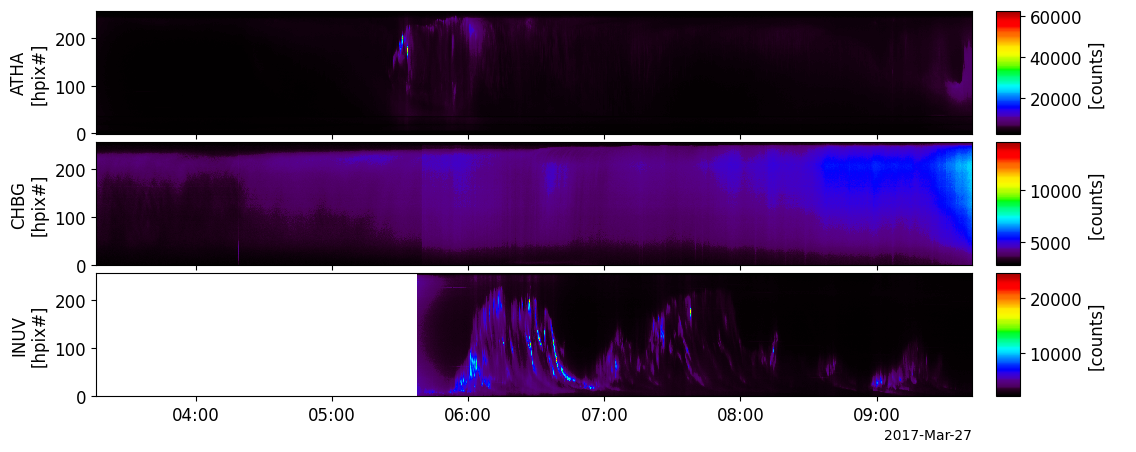

In [60]:
tplot(['thg_ask_atha', 'thg_ask_chbg', 'thg_ask_inuv'])

## Ground magnetometer data

In [61]:
pyspedas.projects.themis.gmag(trange=trange)

10-Jan-25 12:03:19: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thg/l1/mag/idx/2017/
10-Jan-25 12:03:20: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l1/mag/idx/2017/thg_l1_idx_20170327_v01.cdf to themis_data/thg/l1/mag/idx/2017/thg_l1_idx_20170327_v01.cdf
10-Jan-25 12:03:22: Download complete: themis_data/thg/l1/mag/idx/2017/thg_l1_idx_20170327_v01.cdf
10-Jan-25 12:03:22: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2017/
10-Jan-25 12:03:22: Downloading https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf to themis_data/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf
10-Jan-25 12:03:24: Download complete: themis_data/thg/l2/mag/atha/2017/thg_l2_mag_atha_20170327_v01.cdf
10-Jan-25 12:03:24: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/chbg/2017/
10-Jan-25 12:03:25: Downloading https://themis.ssl.berkeley.edu/data/themis

['thg_mag_and',
 'thg_mag_atu',
 'thg_mag_bfe',
 'thg_mag_bjn',
 'thg_mag_dmh',
 'thg_mag_dob',
 'thg_mag_don',
 'thg_mag_fhb',
 'thg_mag_gdh',
 'thg_mag_ghb',
 'thg_mag_hop',
 'thg_mag_hov',
 'thg_mag_jan',
 'thg_mag_jck',
 'thg_mag_kar',
 'thg_mag_kuv',
 'thg_mag_lyr',
 'thg_mag_nal',
 'thg_mag_naq',
 'thg_mag_nor',
 'thg_mag_roe',
 'thg_mag_rvk',
 'thg_mag_skt',
 'thg_mag_sol',
 'thg_mag_sor',
 'thg_mag_stf',
 'thg_mag_sum',
 'thg_mag_svs',
 'thg_mag_tdc',
 'thg_mag_thl',
 'thg_mag_tro',
 'thg_idx_al',
 'thg_idx_au',
 'thg_idx_ae',
 'thg_mag_amd',
 'thg_mag_atha',
 'thg_mag_bbg',
 'thg_mag_blc',
 'thg_mag_bou',
 'thg_mag_brn',
 'thg_mag_brw',
 'thg_mag_bsl',
 'thg_mag_cbb',
 'thg_mag_ccnv',
 'thg_mag_cdrt',
 'thg_mag_chbg',
 'thg_mag_cigo',
 'thg_mag_cmo',
 'thg_mag_crvr',
 'thg_mag_ded',
 'thg_mag_dik',
 'thg_mag_frd',
 'thg_mag_frn',
 'thg_mag_fsim',
 'thg_mag_fsmi',
 'thg_mag_fykn',
 'thg_mag_gbay',
 'thg_mag_gill',
 'thg_mag_gjoa',
 'thg_mag_gua',
 'thg_mag_han',
 'thg_mag_hon',

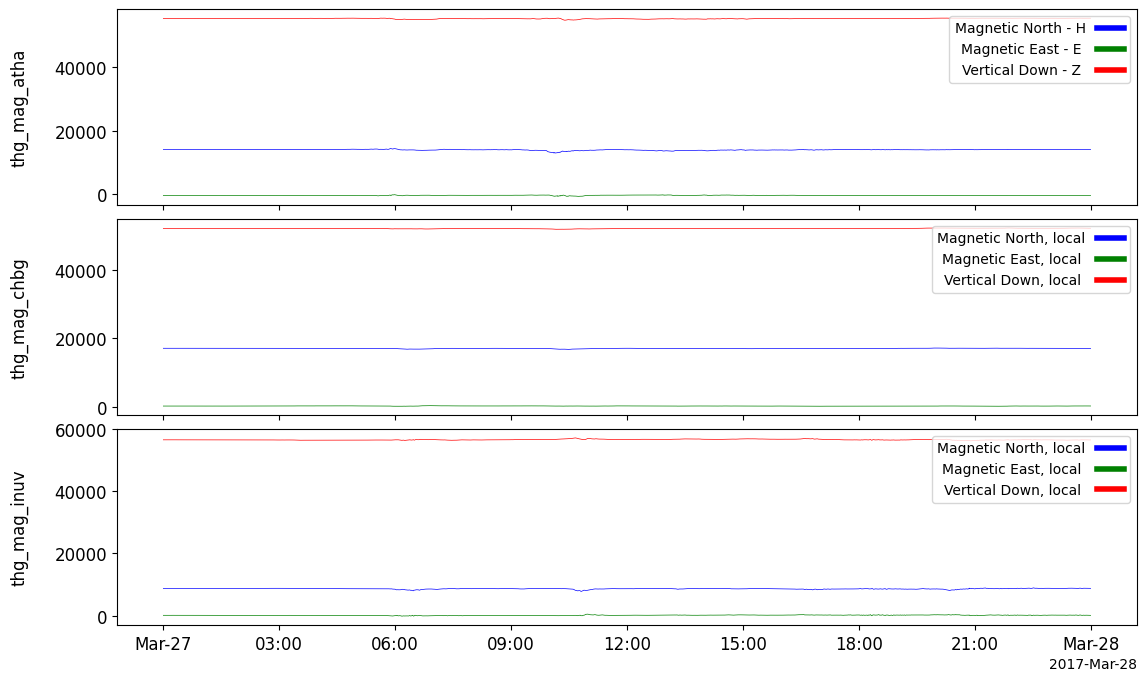

In [62]:
tplot(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv'], ysize=8)

Subtract the median from the ground mag data

In [63]:
from pyspedas import subtract_median

subtract_median(['thg_mag_atha', 'thg_mag_chbg', 'thg_mag_inuv'])

10-Jan-25 12:21:20: Subtract Median was applied to: thg_mag_atha-m
10-Jan-25 12:21:20: Subtract Median was applied to: thg_mag_chbg-m
10-Jan-25 12:21:20: Subtract Median was applied to: thg_mag_inuv-m


['thg_mag_atha-m', 'thg_mag_chbg-m', 'thg_mag_inuv-m']

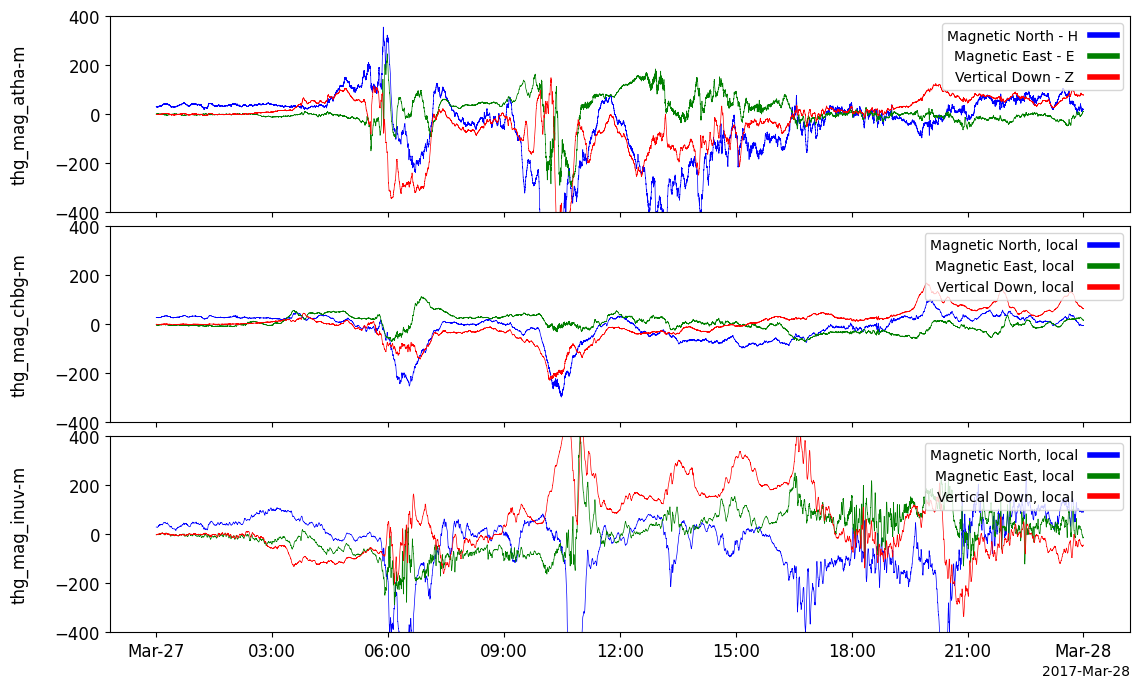

In [64]:
options('thg_mag_atha-m', 'yrange', [-400, 400])
options('thg_mag_chbg-m', 'yrange', [-400, 400])
options('thg_mag_inuv-m', 'yrange', [-400, 400])

tplot(['thg_mag_atha-m', 'thg_mag_chbg-m', 'thg_mag_inuv-m'], ysize=8)

## Magnetic Induction Coil Array (MICA)

In [65]:
nal_vars = pyspedas.projects.mica.induction(site='NAL', trange=trange)


10-Jan-25 12:21:26: Downloading remote index: http://mirl.unh.edu/ULF/cdf/NAL/2017/03/
10-Jan-25 12:21:30: Downloading http://mirl.unh.edu/ULF/cdf/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf to mica_data/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf
10-Jan-25 12:21:48: Download complete: mica_data/NAL/2017/03/mica_ulf_nal_20170327_v00.cdf


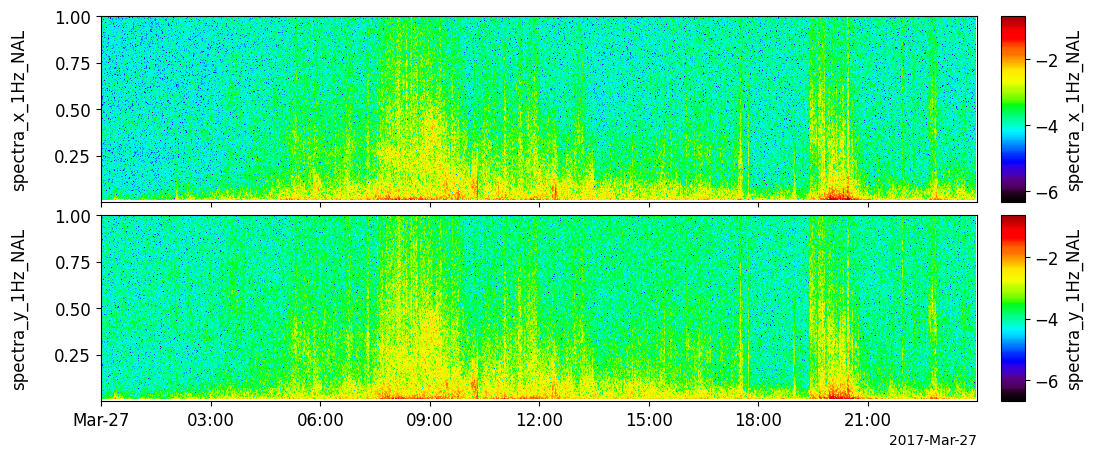

In [66]:
tplot('spectra_?_1Hz_NAL')

## Resources

### PyTplot Basics
- [Introduction to PyTplot](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Introduction_to_PyTplot.ipynb)

### Loading Data
- [MMS examples](https://github.com/spedas/mms-examples/tree/master/basic)
- [THEMIS examples](https://github.com/spedas/themis-examples/tree/main/basic)
- [Load data from HAPI servers](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PySPEDAS_loading_data_from_HAPI_servers.ipynb)

### Plotting Data
- [Annotations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_annotations.ipynb)
- [Range options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_range_options.ipynb)
- [Spectrogram options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_spectrogram_options.ipynb)
- [Legend options](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_legend_options.ipynb)
- [Markers and symbols](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_markers_and_symbols.ipynb)
- [Error bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_error_bars.ipynb)
- [Pseudo variables](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_pseudo_variables.ipynb)
- [Highlight intervals and vertical bars](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/PyTplot_highlight_intervals_and_vertical_bars.ipynb)

### Dates and Times
- [Working with dates and times](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Working_with_dates_and_times_with_PySPEDAS_PyTplot.ipynb)

### Coordinate Transformations
- [Coordinate transformations](https://github.com/spedas/pyspedas_examples/blob/master/pyspedas_examples/notebooks/Coordinate_transformations_with_OMNI_data.ipynb)
- [Boundary normal (LMN) coordinates](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_LMN_coordinate_transformation.ipynb)
- [Quaternion transformations with SpacePy](https://github.com/spedas/mms-examples/blob/master/basic/MMS_quaternion_coordinate_transformations.ipynb)

### Analysis
- [Plasma calculations with PlasmaPy](https://github.com/spedas/mms-examples/blob/master/advanced/Plasma%20calculations%20with%20PlasmaPy.ipynb)
- [Poynting flux with MMS data](https://github.com/spedas/mms-examples/blob/master/advanced/Poynting_flux_with_MMS_data.ipynb)
- [Plasma beta with MMS data](https://github.com/spedas/mms-examples/blob/master/basic/Plasma%20Beta%20with%20FGM%20and%20FPI%20data.ipynb) (note: the PlasmaPy notebook above shows a much easier method)
- [Curlometer calculations](https://github.com/spedas/mms-examples/blob/master/basic/Curlometer%20Technique.ipynb)
- [Neutral sheet models](https://github.com/spedas/mms-examples/blob/master/advanced/MMS_neutral_sheet_models.ipynb)
- [Wave polarization calculations](https://github.com/spedas/mms-examples/blob/master/advanced/Wave_polarization_using_SCM_data.ipynb)
- [Dynamic power spectra calculations](https://github.com/spedas/mms-examples/blob/master/basic/Search-coil%20Magnetometer%20(SCM).ipynb)
- [2D slices of MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate_2D_slices_of_FPI_and_HPCA_data.ipynb)
- [Generating spectrograms and moments from MMS distribution functions](https://github.com/spedas/mms-examples/blob/master/advanced/Generate%20spectrograms%20and%20moments%20with%20mms_part_getspec.ipynb)


### Documentation
- [Advanced Composition Explorer (ACE)](https://pyspedas.readthedocs.io/en/latest/ace.html)
- [Akebono](https://pyspedas.readthedocs.io/en/latest/akebono.html)
- [Arase (ERG)](https://pyspedas.readthedocs.io/en/latest/erg.html)
- [Cluster](https://pyspedas.readthedocs.io/en/latest/cluster.html)
- [Colorado Student Space Weather Experiment (CSSWE)](https://pyspedas.readthedocs.io/en/latest/csswe.html)
- [Communications/Navigation Outage Forecasting System (C/NOFS)](https://pyspedas.readthedocs.io/en/latest/cnofs.html)
- [Deep Space Climate Observatory (DSCOVR)](https://pyspedas.readthedocs.io/en/latest/dscovr.html)
- [Dynamics Explorer 2 (DE2)](https://pyspedas.readthedocs.io/en/latest/de2.html)
- [Equator-S](https://pyspedas.readthedocs.io/en/latest/equator-s.html)
- [Fast Auroral Snapshot Explorer (FAST)](https://pyspedas.readthedocs.io/en/latest/fast.html)
- [Geotail](https://pyspedas.readthedocs.io/en/latest/geotail.html)
- [Geostationary Operational Environmental Satellite (GOES)](https://pyspedas.readthedocs.io/en/latest/goes.html)
- [Imager for Magnetopause-to-Aurora Global Exploration (IMAGE)](https://pyspedas.readthedocs.io/en/latest/image.html)
- [Kyoto Dst Index](https://pyspedas.readthedocs.io/en/latest/kyoto.html)
- [LANL](https://pyspedas.readthedocs.io/en/latest/lanl.html)
- [Mars Atmosphere and Volatile Evolution (MAVEN)](https://pyspedas.readthedocs.io/en/latest/maven.html)
- [Magnetic Induction Coil Array (MICA)](https://pyspedas.readthedocs.io/en/latest/mica.html)
- [Magnetospheric Multiscale (MMS)](https://pyspedas.readthedocs.io/en/latest/mms.html)
- [OMNI](https://pyspedas.readthedocs.io/en/latest/omni.html)
- [Polar Orbiting Environmental Satellites (POES)](https://pyspedas.readthedocs.io/en/latest/poes.html)
- [Polar](https://pyspedas.readthedocs.io/en/latest/polar.html)
- [Parker Solar Probe (PSP)](https://pyspedas.readthedocs.io/en/latest/psp.html)
- [Solar & Heliospheric Observatory (SOHO)](https://pyspedas.readthedocs.io/en/latest/soho.html)
- [Solar Orbiter (SOLO)](https://pyspedas.readthedocs.io/en/latest/solo.html)
- [Solar Terrestrial Relations Observatory (STEREO)](https://pyspedas.readthedocs.io/en/latest/stereo.html)
- [Space Technology 5 (ST5)](https://pyspedas.readthedocs.io/en/latest/st5.html)
- [Spherical Elementary Currents (SECS)](https://github.com/spedas/pyspedas/blob/master/pyspedas.projects.secs/README.md)
- [Swarm](https://github.com/spedas/pyspedas/blob/master/pyspedas.projects.swarm/README.md)
- [Time History of Events and Macroscale Interactions during Substorms (THEMIS)](https://pyspedas.readthedocs.io/en/latest/themis.html)
- [Two Wide-Angle Imaging Neutral-Atom Spectrometers (TWINS)](https://pyspedas.readthedocs.io/en/latest/twins.html)
- [Ulysses](https://pyspedas.readthedocs.io/en/latest/ulysses.html)
- [Van Allen Probes (RBSP)](https://pyspedas.readthedocs.io/en/latest/rbsp.html)
- [Wind](https://pyspedas.readthedocs.io/en/latest/wind.html)